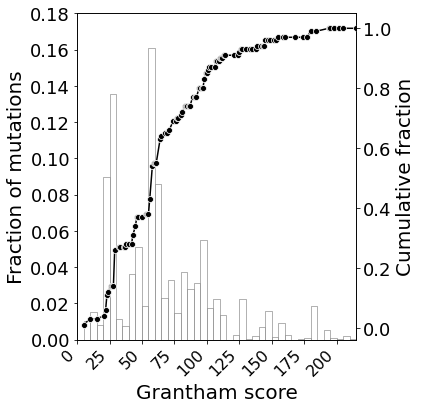

In [3]:
#Figure 5D

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(5, 6)
ec1=pd.read_csv('lplanta_syno_non_syno_and_grantham_score_without_stop_codons.csv', index_col=0)
non_syno=ec1[ec1.AA_mutation_effect == 'Non-synonymous']
ns_g_c=non_syno[['Query_codon','Cons_codon']].groupby(non_syno['Grantham_dist']).value_counts(normalize=True).reset_index(name='GS_count')
ns_g_c['sum_GS_count'] = ns_g_c.groupby('Grantham_dist')['GS_count'].transform('sum')
ns_g_c=non_syno['Grantham_dist'].value_counts(normalize=True).reset_index(name='GS_count')
ns_g_c=ns_g_c.sort_values(by='index')
ns_g_c['cum_GS']=ns_g_c['GS_count'].cumsum()
ns_g_c['GS_count']=ns_g_c['GS_count'].round(2)
ns_g_c['cum_GS']=ns_g_c['cum_GS'].round(2)
g=sns.histplot(data=non_syno, x="Grantham_dist",stat="proportion",binwidth=5, color='white', alpha=0.6,edgecolor="grey")
ax.autoscale(tight=True)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
ax.set_ylim(0, 0.18)
ax.set_xlim(0, 215)
plt.xticks(rotation = 45, ha="right") # Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Fraction of mutations',fontsize=20)
plt.xlabel('Grantham score',fontsize=20)
ax1 = plt.twinx()
g1=sns.lineplot(data=ns_g_c, x='index', y='cum_GS', lw=1.5,color='black', markers=True,dashes=False,marker='o')
plt.ylabel('Cumulative fraction',fontsize=20)
plt.yticks(fontsize=18)
plt.show()


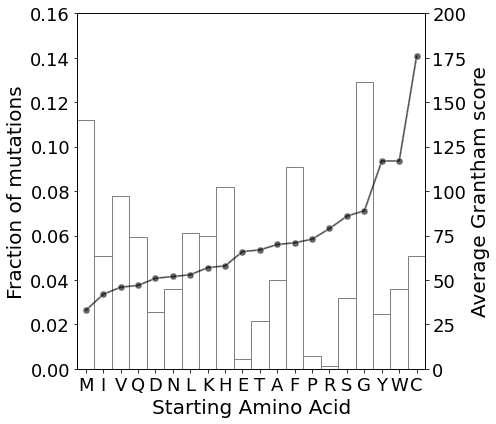

In [6]:
#Figure 5E

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#non-synonymous amino acid substitutions
ns_a=pd.read_csv('lplanta_aa_sub_non_syno_avg_gs.csv')
#synonymous amino acid substitutions
s_a=pd.read_csv('lplanta_aa_sub_count_syno.csv')
ns_a=ns_a.set_index('aa_substitution')
s_a=s_a.set_index('aa_substitution')
##all syonymous and non-synonymous amino acid substitutions
ec1=pd.read_csv('lplanta_syno_non_syno_and_grantham_score_without_stop_codons.csv', index_col=0)
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
#ax1 = plt.subplot()
g=sns.histplot(data=ec1, x="Cons_aa",stat="proportion",binwidth=2, color='white', edgecolor="grey",alpha=0.5)
ax.autoscale(tight=True)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.set_ylim(0, 0.16)
plt.ylabel('Fraction of mutations',fontsize=20)
plt.xlabel('Grantham score',fontsize=20)
ax.set(xlabel='Starting Amino Acid', ylabel='Fraction of mutations')
ax1 = plt.twinx()
ns_a=ns_a.sort_values(by='Average_GS')
g1=sns.lineplot(data=ns_a, x='Cons_aa', y='Average_GS', lw=1.5,color='black', alpha=0.6,marker='o',markersize=7,markers=True,dashes=False)
plt.yticks(fontsize=18)
plt.ylabel('Average Grantham score',fontsize=20)
ax1.autoscale(tight=True)
ax1.set_ylim(0, 200)
fig.tight_layout() 
plt.show()


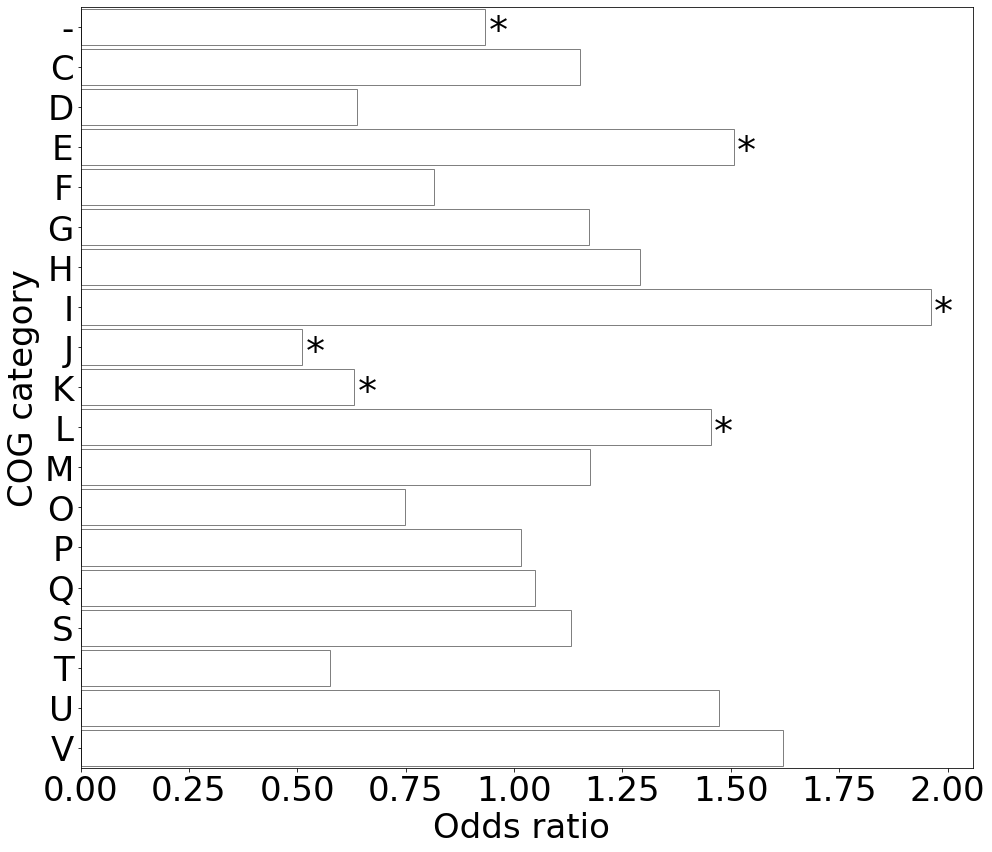

In [9]:
# Figure 5B

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
df=pd.read_csv('cog_var_count_and_no_of_genes_with_fisher_exact_results.csv', index_col=0)
df
import math
import numpy as np
df['log2odd']=np.log2(df['Odds_ratio'])
df1=df[['COG_category','log2odd','Odds_ratio']]
fig, ax= plt.subplots(figsize=(16,14))
ax=sns.barplot(data=df1, y="COG_category", x="Odds_ratio",width=0.9,palette=['white'], edgecolor='grey',orient='h')
plt.ylabel('COG category',fontsize=34)
plt.xlabel('Odds ratio ',fontsize=34)
plt.yticks(fontsize=34)
plt.xticks(fontsize=34)
# Categories for which you want to add an asterisk
categories_with_asterisk = ['I','E','L','-','K','J']
# Add asterisks for specific categories
for i, bar in enumerate(ax.patches):
    if df1['COG_category'][i] in categories_with_asterisk:
        ax.text(bar.get_width()+0.03 ,
                bar.get_y() + bar.get_height()/2 +0.6,
                '*',
                fontsize=38,
                ha='center',va='bottom',
                color='black')

plt.show()


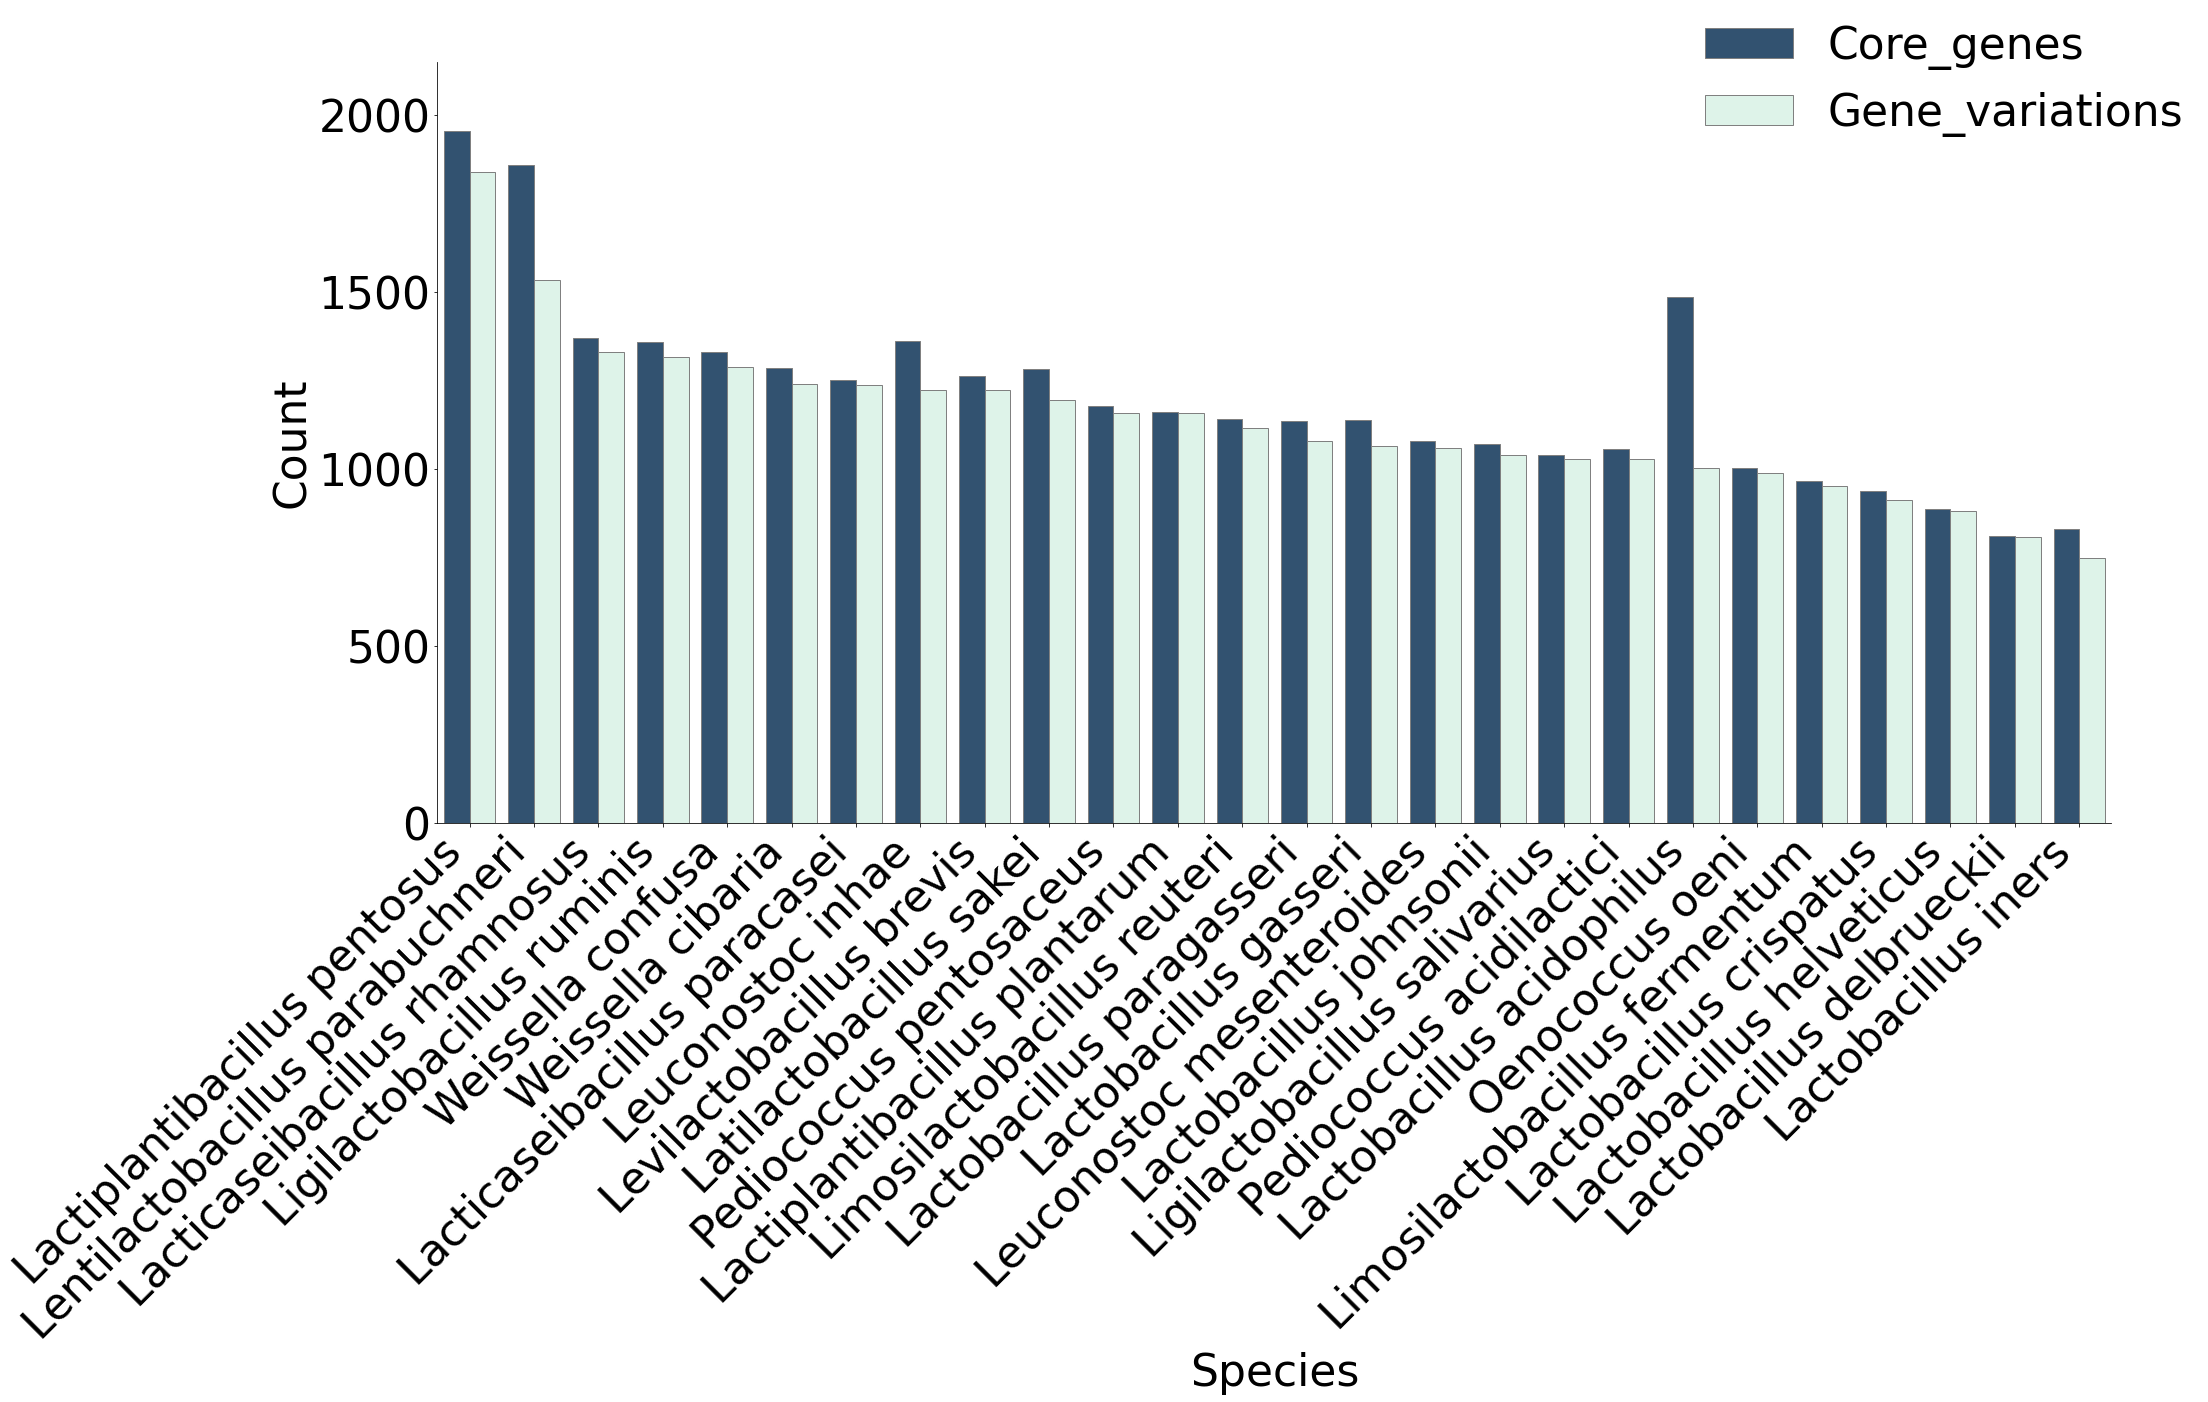

In [11]:
# Figure S1 A

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c4=pd.read_csv('lacto_all_core_genes_and_variant_genes_num_alleles_before_and_after_processing_with_species.csv', index_col=0)
c4['Species'] = c4['Species'].apply({'Pediococcus_acidilactici':'Pediococcus acidilactici','Lactobacillus_crispatus':'Lactobacillus crispatus','Lactobacillus_delbrueckii':'Lactobacillus delbrueckii','Lactobacillus_johnsonii':'Lactobacillus johnsonii','Lactobacillus_helveticus':'Lactobacillus helveticus','Lactobacillus_paragasseri':'Lactobacillus paragasseri','Pediococcus_pentosaceus':'Pediococcus pentosaceus','Lactobacillus_iners':'Lactobacillus iners','Lactobacillus_gasseri':'Lactobacillus gasseri','Lactobacillus_acidophilus':'Lactobacillus acidophilus','Weissella_confusa':'Weissella confusa','Weissella_cibaria':'Weissella cibaria','Lactiplantibacillus_plantarum':'Lactiplantibacillus plantarum','Lactiplantibacillus_pentosus':'Lactiplantibacillus pentosus','Ligilactobacillus_salivarius':'Ligilactobacillus salivarius','Ligilactobacillus_ruminis':'Ligilactobacillus ruminis','Leuconostoc_mesenteroides':'Leuconostoc mesenteroides','Leuconostoc_inhae':'Leuconostoc inhae','Lacticaseibacillus_paracasei':'Lacticaseibacillus paracasei','Lacticaseibacillus_rhamnosus':'Lacticaseibacillus rhamnosus','Oenococcus_oeni':'Oenococcus oeni','Latilactobacillus_sakei':'Latilactobacillus sakei','Lentilactobacillus_parabuchneri':'Lentilactobacillus parabuchneri','Limosilactobacillus_fermentum':'Limosilactobacillus fermentum','Limosilactobacillus_reuteri':'Limosilactobacillus reuteri','Levilactobacillus_brevis':'Levilactobacillus brevis'}.get)
c4=c4.sort_values(by='Gene_variations', ascending=False)
df1 = c4.melt(id_vars=['Species'], value_vars=['Core_genes', 'Gene_variations', ],var_name='Genes_alleles',value_name='Count')
df2 = c4.melt(id_vars=['Species'], value_vars=['Num_Alleles', 'Num_alleles_after'],var_name='Num_alleles',value_name='Count')
fig, ax= plt.subplots(figsize=(30,14))
ax1=sns.barplot(data=df1, x="Species", y="Count", hue="Genes_alleles",width=0.8,palette=['#28527A','#DBF6E9'],edgecolor='gray')
ax.tick_params(axis='x', labelsize=44)
ax.tick_params(axis='y', labelsize=44)
ax.margins(y=0.1)
plt.xticks(rotation = 45, ha="right") # Rotates X-Axis Ticks by 45-degrees
sns.despine()
plt.xlabel('Species',fontsize=44)
plt.ylabel('Count',fontsize=44)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.90, 0.85), ncol=1, title=None,fontsize="44", frameon=False)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


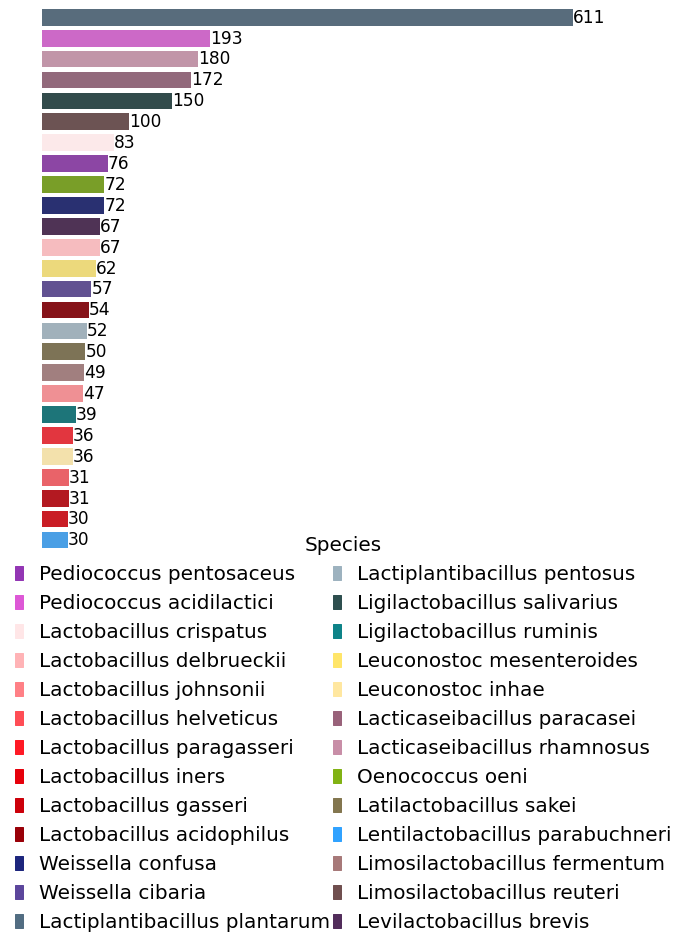

In [13]:
# Figure S1 C

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches

c3=pd.read_csv('lacto_all_sp_with_strain_and_strains_having_variants.csv', index_col=0)
c3['Species'] = c3['Species'].apply({'Pediococcus_acidilactici':'Pediococcus acidilactici','Lactobacillus_crispatus':'Lactobacillus crispatus','Lactobacillus_delbrueckii':'Lactobacillus delbrueckii','Lactobacillus_johnsonii':'Lactobacillus johnsonii','Lactobacillus_helveticus':'Lactobacillus helveticus','Lactobacillus_paragasseri':'Lactobacillus paragasseri','Pediococcus_pentosaceus':'Pediococcus pentosaceus','Lactobacillus_iners':'Lactobacillus iners','Lactobacillus_gasseri':'Lactobacillus gasseri','Lactobacillus_acidophilus':'Lactobacillus acidophilus','Weissella_confusa':'Weissella confusa','Weissella_cibaria':'Weissella cibaria','Lactiplantibacillus_plantarum':'Lactiplantibacillus plantarum','Lactiplantibacillus_pentosus':'Lactiplantibacillus pentosus','Ligilactobacillus_salivarius':'Ligilactobacillus salivarius','Ligilactobacillus_ruminis':'Ligilactobacillus ruminis','Leuconostoc_mesenteroides':'Leuconostoc mesenteroides','Leuconostoc_inhae':'Leuconostoc inhae','Lacticaseibacillus_paracasei':'Lacticaseibacillus paracasei','Lacticaseibacillus_rhamnosus':'Lacticaseibacillus rhamnosus','Oenococcus_oeni':'Oenococcus oeni','Latilactobacillus_sakei':'Latilactobacillus sakei','Lentilactobacillus_parabuchneri':'Lentilactobacillus parabuchneri','Limosilactobacillus_fermentum':'Limosilactobacillus fermentum','Limosilactobacillus_reuteri':'Limosilactobacillus reuteri','Levilactobacillus_brevis':'Levilactobacillus brevis'}.get)
c3=c3.sort_values(by=['Num_strains_with_var'],ascending=False)
col_dict={'Pediococcus pentosaceus':'#9336B4', 'Pediococcus acidilactici':'#DD58D6','Lactobacillus crispatus':'#FFE6E7','Lactobacillus delbrueckii':'#FFB3B6','Lactobacillus johnsonii':'#FF8086','Lactobacillus helveticus':'#FF4D55',
    'Lactobacillus paragasseri':'#FF1925','Lactobacillus iners':'#E6000B','Lactobacillus gasseri':'#CC000A','Lactobacillus acidophilus':'#990008','Weissella confusa':'#1D267D','Weissella cibaria':'#5C469C',
    'Lactiplantibacillus plantarum':'#526D82','Lactiplantibacillus pentosus':'#9DB2BF','Ligilactobacillus salivarius':'#2E4F4F','Ligilactobacillus ruminis':'#0E8388',
    'Leuconostoc mesenteroides':'#FFE569','Leuconostoc inhae':'#FFE7A0','Lacticaseibacillus paracasei':'#99627A','Lacticaseibacillus rhamnosus':'#C88EA7',
    'Oenococcus oeni':'#81B214','Latilactobacillus sakei':'#83764F','Lentilactobacillus parabuchneri':'#30A2FF',
    'Limosilactobacillus fermentum':'#A77979','Limosilactobacillus reuteri':'#704F4F','Levilactobacillus brevis':'#522D5B'}
fig, ax= plt.subplots(figsize=(10,10))
ax=sns.barplot(data=c3, x="Num_strains_with_var", y="Species", palette=col_dict)
ax.legend(markerscale=4)
for i in ax.containers:
    ax.bar_label(i,fontsize=17)
plt.axis('off')
patches = [mpatches.Patch(color=v, label=k) for k, v in col_dict.items()]
plt.legend(handles=patches, handlelength=0.4,title='Species',title_fontsize=20,bbox_to_anchor=(-0.08,0.06), ncol=2,columnspacing=0.15,loc='upper left',fontsize=20, frameon=False)
plt.show()



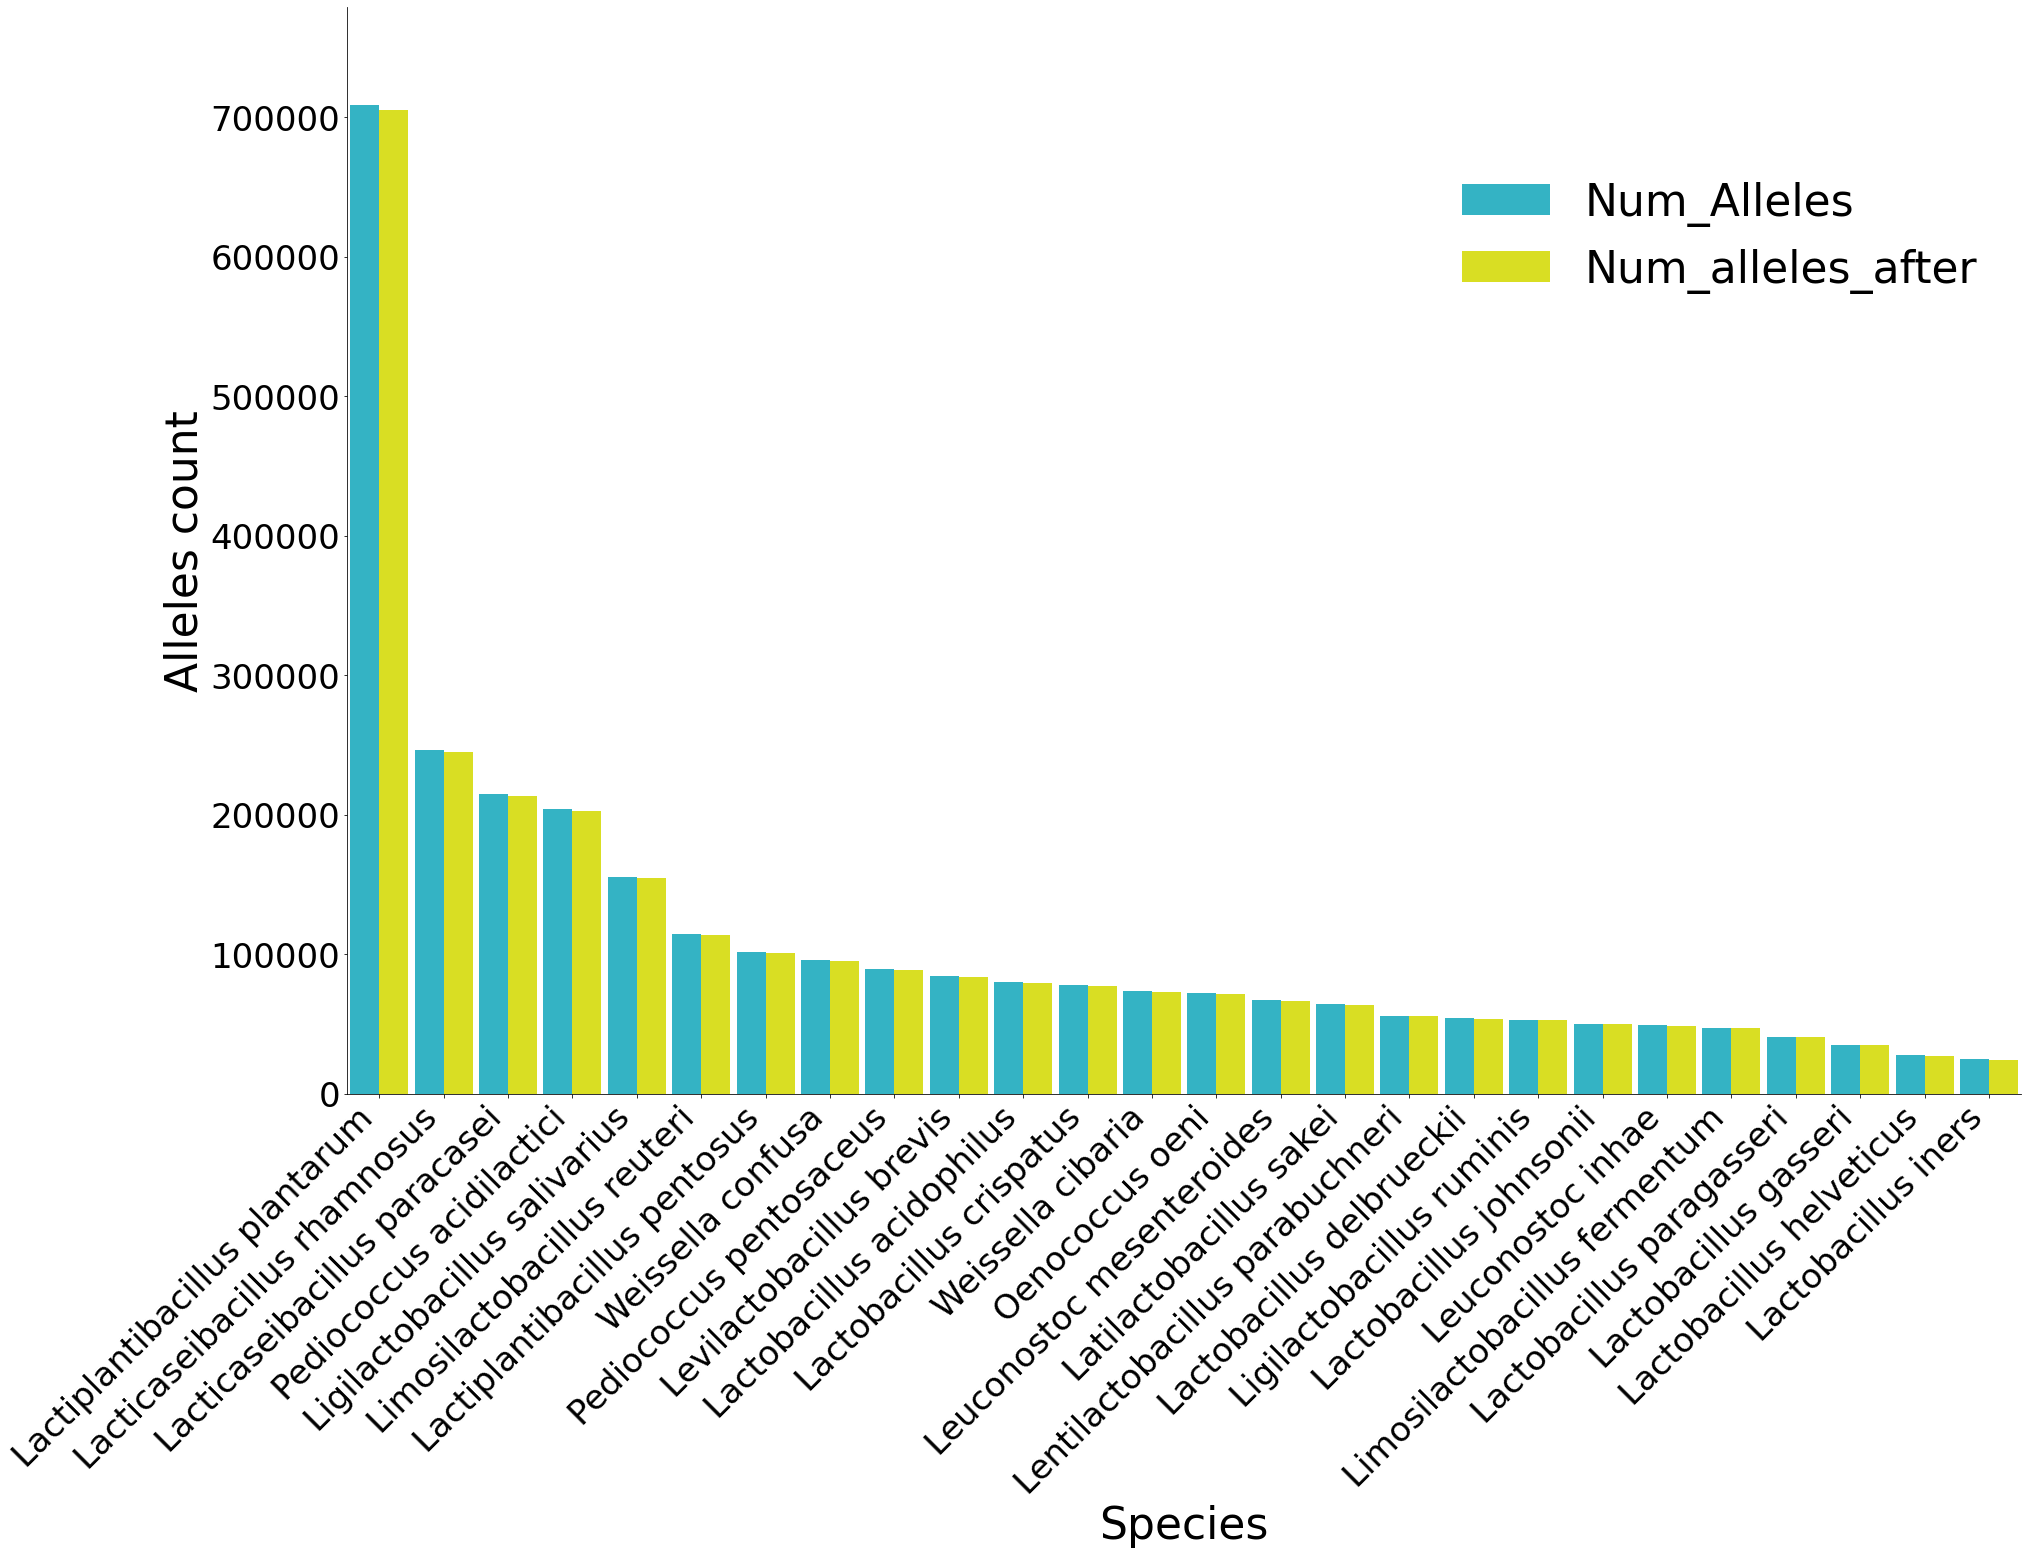

In [15]:
# Figure S1 B

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
c4=pd.read_csv('lacto_all_core_genes_and_variant_genes_num_alleles_before_and_after_processing_with_species.csv', index_col=0)
c4['Species'] = c4['Species'].apply({'Pediococcus_acidilactici':'Pediococcus acidilactici','Lactobacillus_crispatus':'Lactobacillus crispatus','Lactobacillus_delbrueckii':'Lactobacillus delbrueckii','Lactobacillus_johnsonii':'Lactobacillus johnsonii','Lactobacillus_helveticus':'Lactobacillus helveticus','Lactobacillus_paragasseri':'Lactobacillus paragasseri','Pediococcus_pentosaceus':'Pediococcus pentosaceus','Lactobacillus_iners':'Lactobacillus iners','Lactobacillus_gasseri':'Lactobacillus gasseri','Lactobacillus_acidophilus':'Lactobacillus acidophilus','Weissella_confusa':'Weissella confusa','Weissella_cibaria':'Weissella cibaria','Lactiplantibacillus_plantarum':'Lactiplantibacillus plantarum','Lactiplantibacillus_pentosus':'Lactiplantibacillus pentosus','Ligilactobacillus_salivarius':'Ligilactobacillus salivarius','Ligilactobacillus_ruminis':'Ligilactobacillus ruminis','Leuconostoc_mesenteroides':'Leuconostoc mesenteroides','Leuconostoc_inhae':'Leuconostoc inhae','Lacticaseibacillus_paracasei':'Lacticaseibacillus paracasei','Lacticaseibacillus_rhamnosus':'Lacticaseibacillus rhamnosus','Oenococcus_oeni':'Oenococcus oeni','Latilactobacillus_sakei':'Latilactobacillus sakei','Lentilactobacillus_parabuchneri':'Lentilactobacillus parabuchneri','Limosilactobacillus_fermentum':'Limosilactobacillus fermentum','Limosilactobacillus_reuteri':'Limosilactobacillus reuteri','Levilactobacillus_brevis':'Levilactobacillus brevis'}.get)
c4=c4.sort_values(by='Num_Alleles', ascending=False)
df2 = c4.melt(id_vars=['Species'], value_vars=['Num_Alleles', 'Num_alleles_after'],var_name='Num_alleles',value_name='Count')
df2.to_csv('data_num_alleles.csv')
fig, ax= plt.subplots(figsize=(30,20))
ax2=sns.barplot(data=df2, x="Species", y="Count", hue="Num_alleles",width=0.9,palette=['#1CC5DC','#F7FD04'])
ax.tick_params(axis='x', labelsize=34)
ax.tick_params(axis='y', labelsize=34)
ax.margins(y=0.1)
plt.xticks(rotation = 45, ha="right")
sns.despine()
plt.xlabel('Species',fontsize=44)
plt.ylabel('Alleles count',fontsize=44)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.82, 0.70), ncol=1, title=None,fontsize="44", frameon=False)


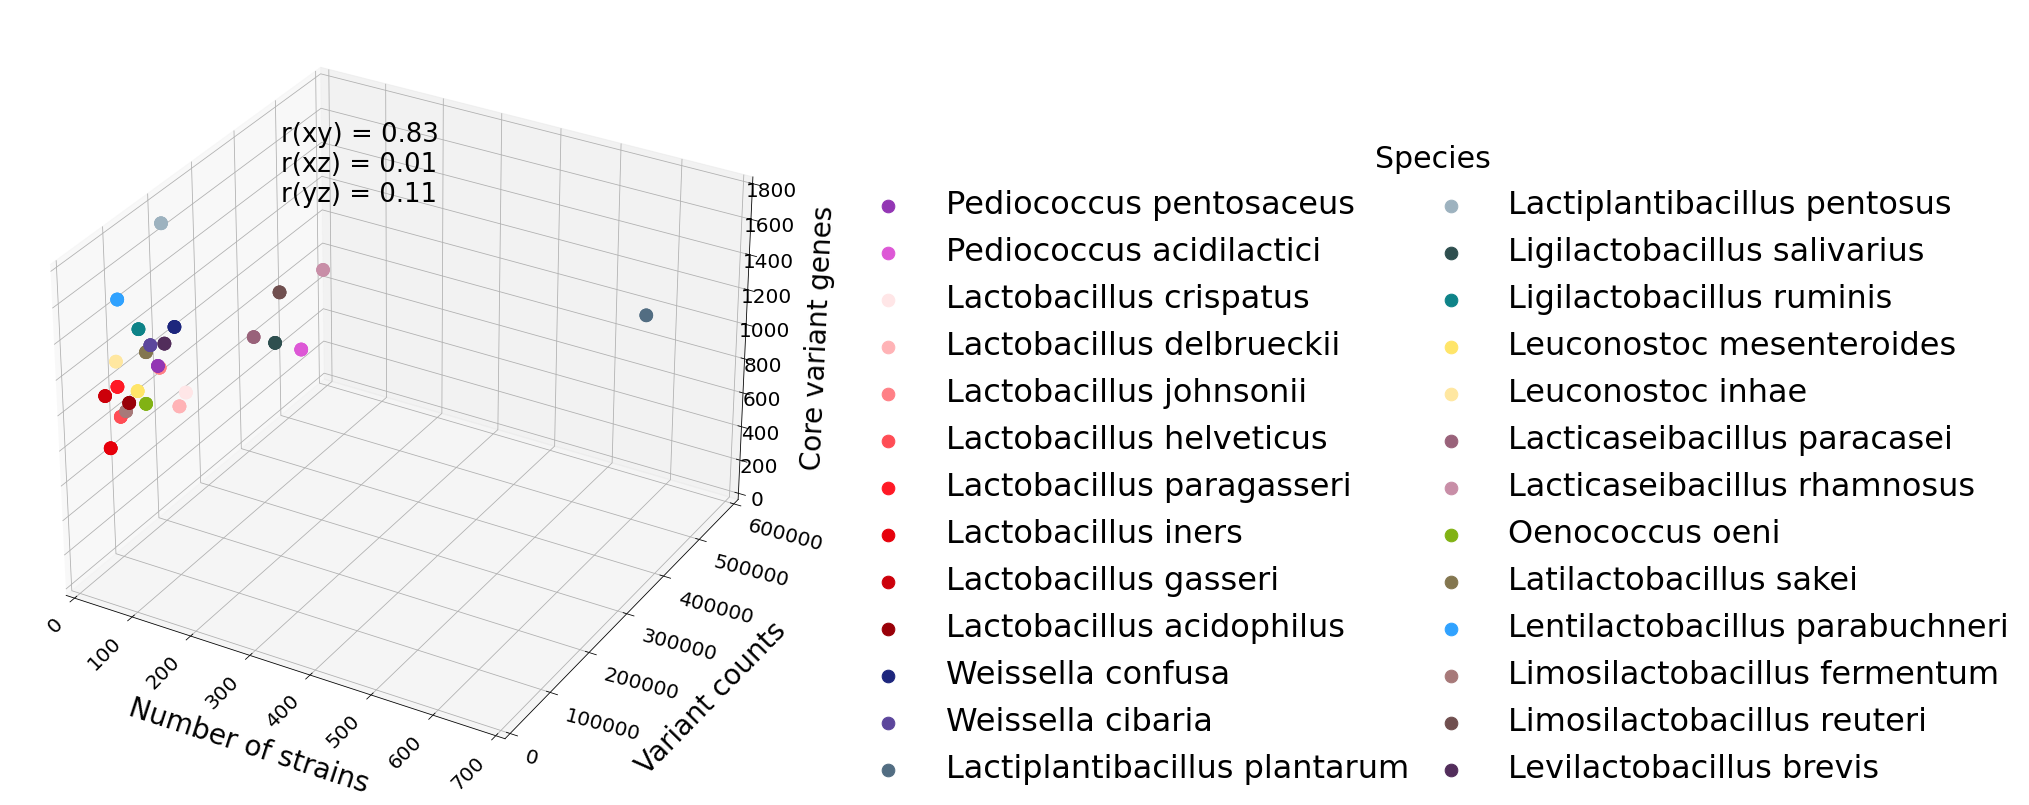

In [18]:
# Figure S1 D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import pearsonr
#3D correlation plot
import pandas as pd
import numpy as np
c4=pd.read_csv('lacto_all_core_genes_and_variant_genes_num_alleles_before_and_after_processing_with_species.csv', index_col=0)
c=pd.read_csv('lacto_all_sp_with_strain_and_strains_having_variants.csv', index_col=0)
d=pd.merge(c4, c, on="Species", how="left")
d['Species'] = d['Species'].apply({'Pediococcus_acidilactici':'Pediococcus acidilactici','Lactobacillus_crispatus':'Lactobacillus crispatus','Lactobacillus_delbrueckii':'Lactobacillus delbrueckii','Lactobacillus_johnsonii':'Lactobacillus johnsonii','Lactobacillus_helveticus':'Lactobacillus helveticus','Lactobacillus_paragasseri':'Lactobacillus paragasseri','Pediococcus_pentosaceus':'Pediococcus pentosaceus','Lactobacillus_iners':'Lactobacillus iners','Lactobacillus_gasseri':'Lactobacillus gasseri','Lactobacillus_acidophilus':'Lactobacillus acidophilus','Weissella_confusa':'Weissella confusa','Weissella_cibaria':'Weissella cibaria','Lactiplantibacillus_plantarum':'Lactiplantibacillus plantarum','Lactiplantibacillus_pentosus':'Lactiplantibacillus pentosus','Ligilactobacillus_salivarius':'Ligilactobacillus salivarius','Ligilactobacillus_ruminis':'Ligilactobacillus ruminis','Leuconostoc_mesenteroides':'Leuconostoc mesenteroides','Leuconostoc_inhae':'Leuconostoc inhae','Lacticaseibacillus_paracasei':'Lacticaseibacillus paracasei','Lacticaseibacillus_rhamnosus':'Lacticaseibacillus rhamnosus','Oenococcus_oeni':'Oenococcus oeni','Latilactobacillus_sakei':'Latilactobacillus sakei','Lentilactobacillus_parabuchneri':'Lentilactobacillus parabuchneri','Limosilactobacillus_fermentum':'Limosilactobacillus fermentum','Limosilactobacillus_reuteri':'Limosilactobacillus reuteri','Levilactobacillus_brevis':'Levilactobacillus brevis'}.get)
d1=pd.read_csv('lacto_all_26_species_multation_counts_and_total_count.csv')
d1=d1.drop_duplicates()
d2=d1[['Species','Total_count']]
d3=pd.merge(d, d2, on="Species", how="left")
d4=d3[['Species','Gene_variations','Num_strains_with_var','Total_count']]
z = d4['Gene_variations']
x = d4['Num_strains_with_var']
y = d4['Total_count']
categories = d4['Species']
# Define a dictionary to map categories to colors
col_dict={'Pediococcus pentosaceus':'#9336B4', 'Pediococcus acidilactici':'#DD58D6','Lactobacillus crispatus':'#FFE6E7','Lactobacillus delbrueckii':'#FFB3B6','Lactobacillus johnsonii':'#FF8086','Lactobacillus helveticus':'#FF4D55',
    'Lactobacillus paragasseri':'#FF1925','Lactobacillus iners':'#E6000B','Lactobacillus gasseri':'#CC000A','Lactobacillus acidophilus':'#990008','Weissella confusa':'#1D267D','Weissella cibaria':'#5C469C',
    'Lactiplantibacillus plantarum':'#526D82','Lactiplantibacillus pentosus':'#9DB2BF','Ligilactobacillus salivarius':'#2E4F4F','Ligilactobacillus ruminis':'#0E8388',
    'Leuconostoc mesenteroides':'#FFE569','Leuconostoc inhae':'#FFE7A0','Lacticaseibacillus paracasei':'#99627A','Lacticaseibacillus rhamnosus':'#C88EA7',
    'Oenococcus oeni':'#81B214','Latilactobacillus sakei':'#83764F','Lentilactobacillus parabuchneri':'#30A2FF',
    'Limosilactobacillus fermentum':'#A77979','Limosilactobacillus reuteri':'#704F4F','Levilactobacillus brevis':'#522D5B'}
colors = [col_dict[category] for category in categories]
# Compute Pearson's correlation coefficient for pairs of data
corr_xy, _ = pearsonr(x, y)
corr_xz, _ = pearsonr(x, z)
corr_yz, _ = pearsonr(y, z)
# Plot 3D scatter plot
fig = plt.figure(figsize = (14, 18))
ax = fig.add_subplot(projection='3d')
for category, color in col_dict.items():
    mask = categories == category
    ax.scatter(x[mask], y[mask], z[mask], c=color, label=category, s=160)
ax.legend(title='Species',title_fontsize=30, bbox_to_anchor=(1.05,0.86), ncol=2,columnspacing=0.3,loc='upper left',fontsize=32, frameon=False)
# Add Pearson's correlation as text annotation
corr_text = f"r(xy) = {corr_xy:.2f}\nr(xz) = {corr_xz:.2f}\nr(yz) = {corr_yz:.2f}"
ax.text2D(0.35, 0.75, corr_text, transform=ax.transAxes,fontsize=26)
ax.set_xlabel('\n\n\nNumber of strains',fontsize=28)
ax.set_ylabel('\n\n\n\n\nVariant counts',fontsize=28)
ax.set_zlabel('\n\n\n Core variant genes \n',fontsize=28)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=-15, ha='left')
ax.set_xlim(0, 700)
ax.set_ylim(0, 600000)
ax.set_zlim(0, 1800)
# Adjust font sizes for axis tick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
plt.show()


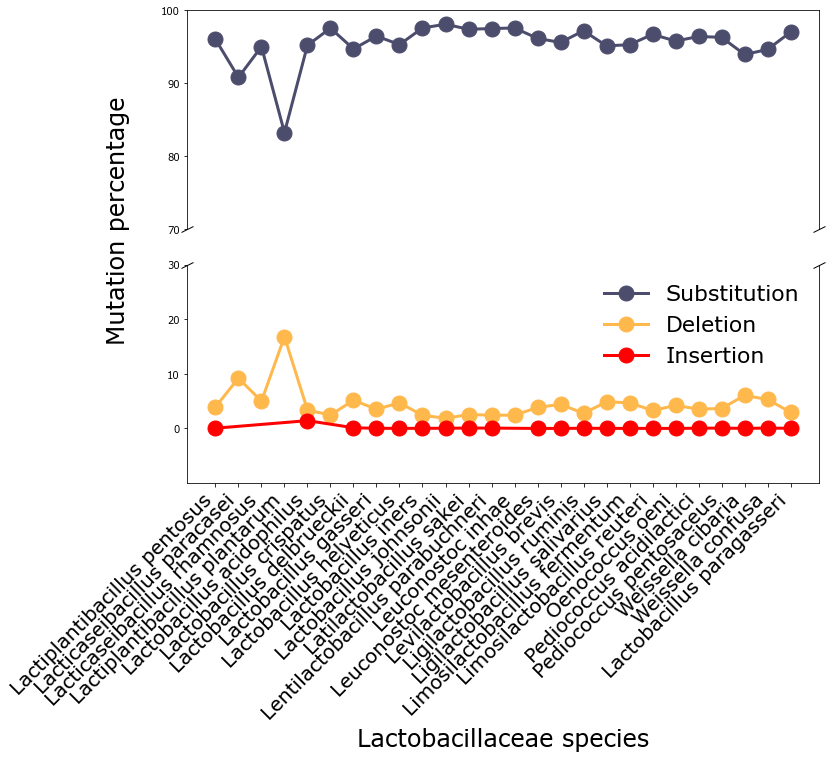

In [25]:
# Figure 2A

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_1=pd.read_csv('lacto_all_26_species_multation_counts_and_total_count.csv',index_col=0)
df_1=df_1.loc[:, ~df_1.columns.str.contains('^Unnamed:')]
plt.rcParams["font.family"] = "Verdana"
df_1['Percentage'] = df_1['Mutation_count'] / df_1['Total_count'] * 100
df_1['Percentage']=df_1['Percentage'].round(3)
#fig, ax = plt.subplots()
df1=df_1[df_1.AA_mutation_type == 'Substitution']
df2=df_1[df_1.AA_mutation_type == 'Deletion']
df3=df_1[df_1.AA_mutation_type == 'Insertion']
values=[0.047,0,0,0,1.427,0,0.132,0.023,0.024,0.016,0.046,0.069,0.066,0,0.003,0.007,0.036,0.016,0.009,0.012,0.001,0.05,0.064,0.019,0.066,0.027]
fig, (ax1, ax2) = plt.subplots(2, 1,  figsize=(12, 11))
fig.subplots_adjust(hspace=0.02)  # adjust space between axes
# Top plot: 70 to 100
ax1.set_ylim(70, 100)
ax1.plot(df1['Species'], df1['Percentage'], color='#4C4C6D', marker='o', markersize=15, linewidth=3, label="Substitution")
ax1.plot(df2['Species'], df2['Percentage'], color='#FFB84C', marker='o', markersize=15, linewidth=3, label="Deletion")
ax1.plot(df3['Species'], df3['Percentage'], color='red', marker='o', markersize=15, linewidth=3, label="Insertion")
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
# Bottom plot: 0 to 30
ax2.set_ylim(-10, 30)
ax2.plot(df1['Species'], df1['Percentage'], color='#4C4C6D', marker='o', markersize=15, linewidth=3, label="Substitution")
ax2.plot(df2['Species'], df2['Percentage'], color='#FFB84C', marker='o', markersize=15, linewidth=3, label="Deletion")
ax2.plot(df3['Species'], df3['Percentage'], color='red', marker='o', markersize=15, linewidth=3, label="Insertion")
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks(np.arange(0, 40, 10))
ax2.tick_params(labeltop=False)  
ax1.set_xticks([]) 
d = .5  
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k',  clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
fig.text(0.14,0.7,"Mutation percentage",size=24, va='center', rotation='vertical')
plt.rc('font', size=22)
plt.xticks(rotation = 45,ha="right", fontsize=20)
plt.xlabel("Lactobacillaceae species", size=24)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1417364786.py:41: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


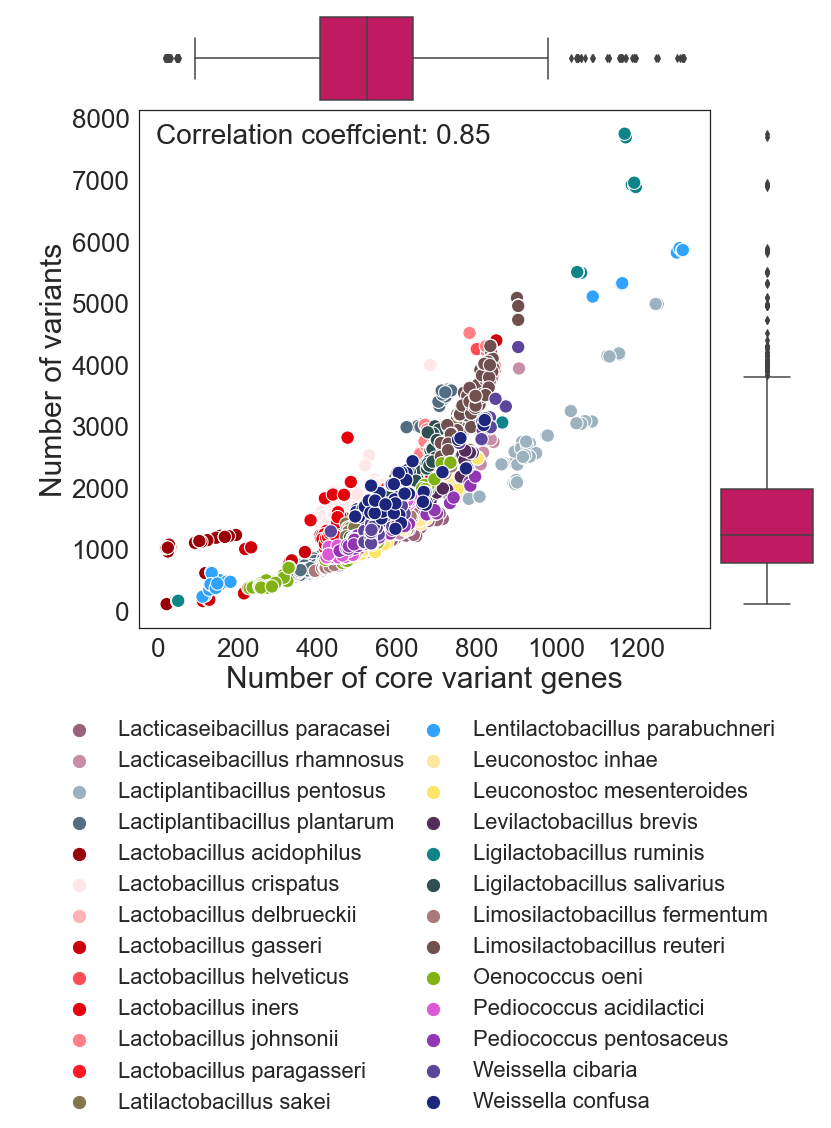

In [27]:
# Figure 2B
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import pearsonr

c2=pd.read_csv('lacto_all_genetic_variants_across_each_strain.csv')
c2['Species'] = c2['Species'].apply({'Pediococcus_acidilactici':'Pediococcus acidilactici','Lactobacillus_crispatus':'Lactobacillus crispatus','Lactobacillus_delbrueckii':'Lactobacillus delbrueckii','Lactobacillus_johnsonii':'Lactobacillus johnsonii','Lactobacillus_helveticus':'Lactobacillus helveticus','Lactobacillus_paragasseri':'Lactobacillus paragasseri','Pediococcus_pentosaceus':'Pediococcus pentosaceus','Lactobacillus_iners':'Lactobacillus iners','Lactobacillus_gasseri':'Lactobacillus gasseri','Lactobacillus_acidophilus':'Lactobacillus acidophilus','Weissella_confusa':'Weissella confusa','Weissella_cibaria':'Weissella cibaria','Lactiplantibacillus_plantarum':'Lactiplantibacillus plantarum','Lactiplantibacillus_pentosus':'Lactiplantibacillus pentosus','Ligilactobacillus_salivarius':'Ligilactobacillus salivarius','Ligilactobacillus_ruminis':'Ligilactobacillus ruminis','Leuconostoc_mesenteroides':'Leuconostoc mesenteroides','Leuconostoc_inhae':'Leuconostoc inhae','Lacticaseibacillus_paracasei':'Lacticaseibacillus paracasei','Lacticaseibacillus_rhamnosus':'Lacticaseibacillus rhamnosus','Oenococcus_oeni':'Oenococcus oeni','Latilactobacillus_sakei':'Latilactobacillus sakei','Lentilactobacillus_parabuchneri':'Lentilactobacillus parabuchneri','Limosilactobacillus_fermentum':'Limosilactobacillus fermentum','Limosilactobacillus_reuteri':'Limosilactobacillus reuteri','Levilactobacillus_brevis':'Levilactobacillus brevis'}.get)

col_dict={'Pediococcus pentosaceus':'#9336B4', 'Pediococcus acidilactici':'#DD58D6','Lactobacillus crispatus':'#FFE6E7','Lactobacillus delbrueckii':'#FFB3B6','Lactobacillus johnsonii':'#FF8086','Lactobacillus helveticus':'#FF4D55',
    'Lactobacillus paragasseri':'#FF1925','Lactobacillus iners':'#E6000B','Lactobacillus gasseri':'#CC000A','Lactobacillus acidophilus':'#990008','Weissella confusa':'#1D267D','Weissella cibaria':'#5C469C',
    'Lactiplantibacillus plantarum':'#526D82','Lactiplantibacillus pentosus':'#9DB2BF','Ligilactobacillus salivarius':'#2E4F4F','Ligilactobacillus ruminis':'#0E8388',
    'Leuconostoc mesenteroides':'#FFE569','Leuconostoc inhae':'#FFE7A0','Lacticaseibacillus paracasei':'#99627A','Lacticaseibacillus rhamnosus':'#C88EA7',
    'Oenococcus oeni':'#81B214','Latilactobacillus sakei':'#83764F','Lentilactobacillus parabuchneri':'#30A2FF',
    'Limosilactobacillus fermentum':'#A77979','Limosilactobacillus reuteri':'#704F4F','Levilactobacillus brevis':'#522D5B'}
x=c2['Gene_nunique']
y=c2['AA_mutation_type_count']
r = np.corrcoef(x, y)
r
sns.set(style="white")
rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 32, 'ytick.labelsize': 32}
g = sns.JointGrid(c2, 
                  x="Gene_nunique",
                  y="AA_mutation_type_count", hue="Species",space=0)
correlation, _ = pearsonr(c2['Gene_nunique'], c2['AA_mutation_type_count'])
grid=g.plot_joint(sns.scatterplot,palette=col_dict, s=180)
g.plot_marginals(sns.boxplot, palette=['#DB005B'] )
plt.subplots_adjust(right=0.80)
legend=g.ax_joint.legend(bbox_to_anchor=(-0.16, -0.16), ncol=2, loc='upper left',columnspacing=0.3, borderaxespad=0, fontsize=22, frameon=False)
for handle in legend.legendHandles:
    handle._sizes=[150]
g.fig.set_figwidth(14)
g.fig.set_figheight(10)
g.ax_joint.set_ylabel('\nNumber of variants',fontsize=30)
g.ax_joint.set_xlabel('Number of core variant genes',fontsize=30)
g.ax_marg_x.set_facecolor('#FFFFFF')
g.ax_marg_y.set_facecolor('#FFFFFF')
plt.setp(g.ax_joint.get_xticklabels(), fontsize=26)
plt.setp(g.ax_joint.get_yticklabels(), fontsize=26)
plt.text(x=0.03, y=0.95, s=f'Correlation coeffcient: {correlation:.2f}', ha='left', va='center',fontsize=28,transform=grid.ax_joint.transAxes)
plt.show()


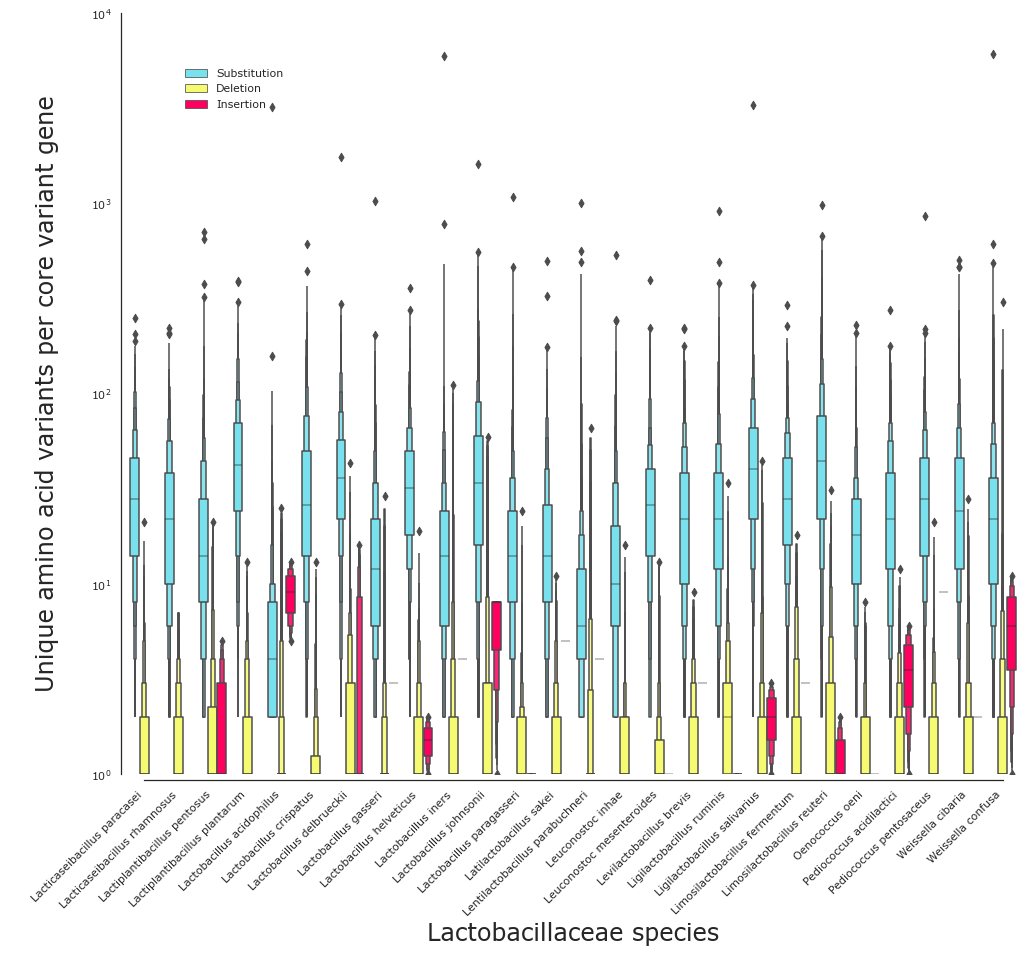

In [6]:
#Figure 2C
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Verdana"
indel=pd.read_csv('lacto_all_unique_insertion_deletion_and_substitutions_count_with_species_name.csv',index_col=0)
indel=indel.loc[:, ~indel.columns.str.contains('^Unnamed:')]
indel.sort_values(by=['Species'], inplace=True, ascending=True)
indel
fig, ax = plt.subplots(figsize=(16,14))
my_pal = {"Substitution": "#79E0EE", "Deletion": "#F6FA70", "Insertion":"#FF0060"}
ax=sns.boxenplot(data=indel, y="Mutation_count", x="Species", hue="Mutation_type",palette=my_pal,saturation=1,k_depth="proportion")
ax.set_ylim(1, 10000)
ax.set(yscale="log")
sns.despine(offset=6, trim=True)
plt.setp(ax.get_xticklabels(), rotation=45,ha='right')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.12, 0.86), ncol=1, title=None, frameon=False,
)
plt.rc('font', size=28)
plt.rcParams["font.family"] = "Verdana"
plt.xlabel("Lactobacillaceae species", size=24)
plt.ylabel("\nUnique amino acid variants per core variant gene\n",size=24)
plt.show()

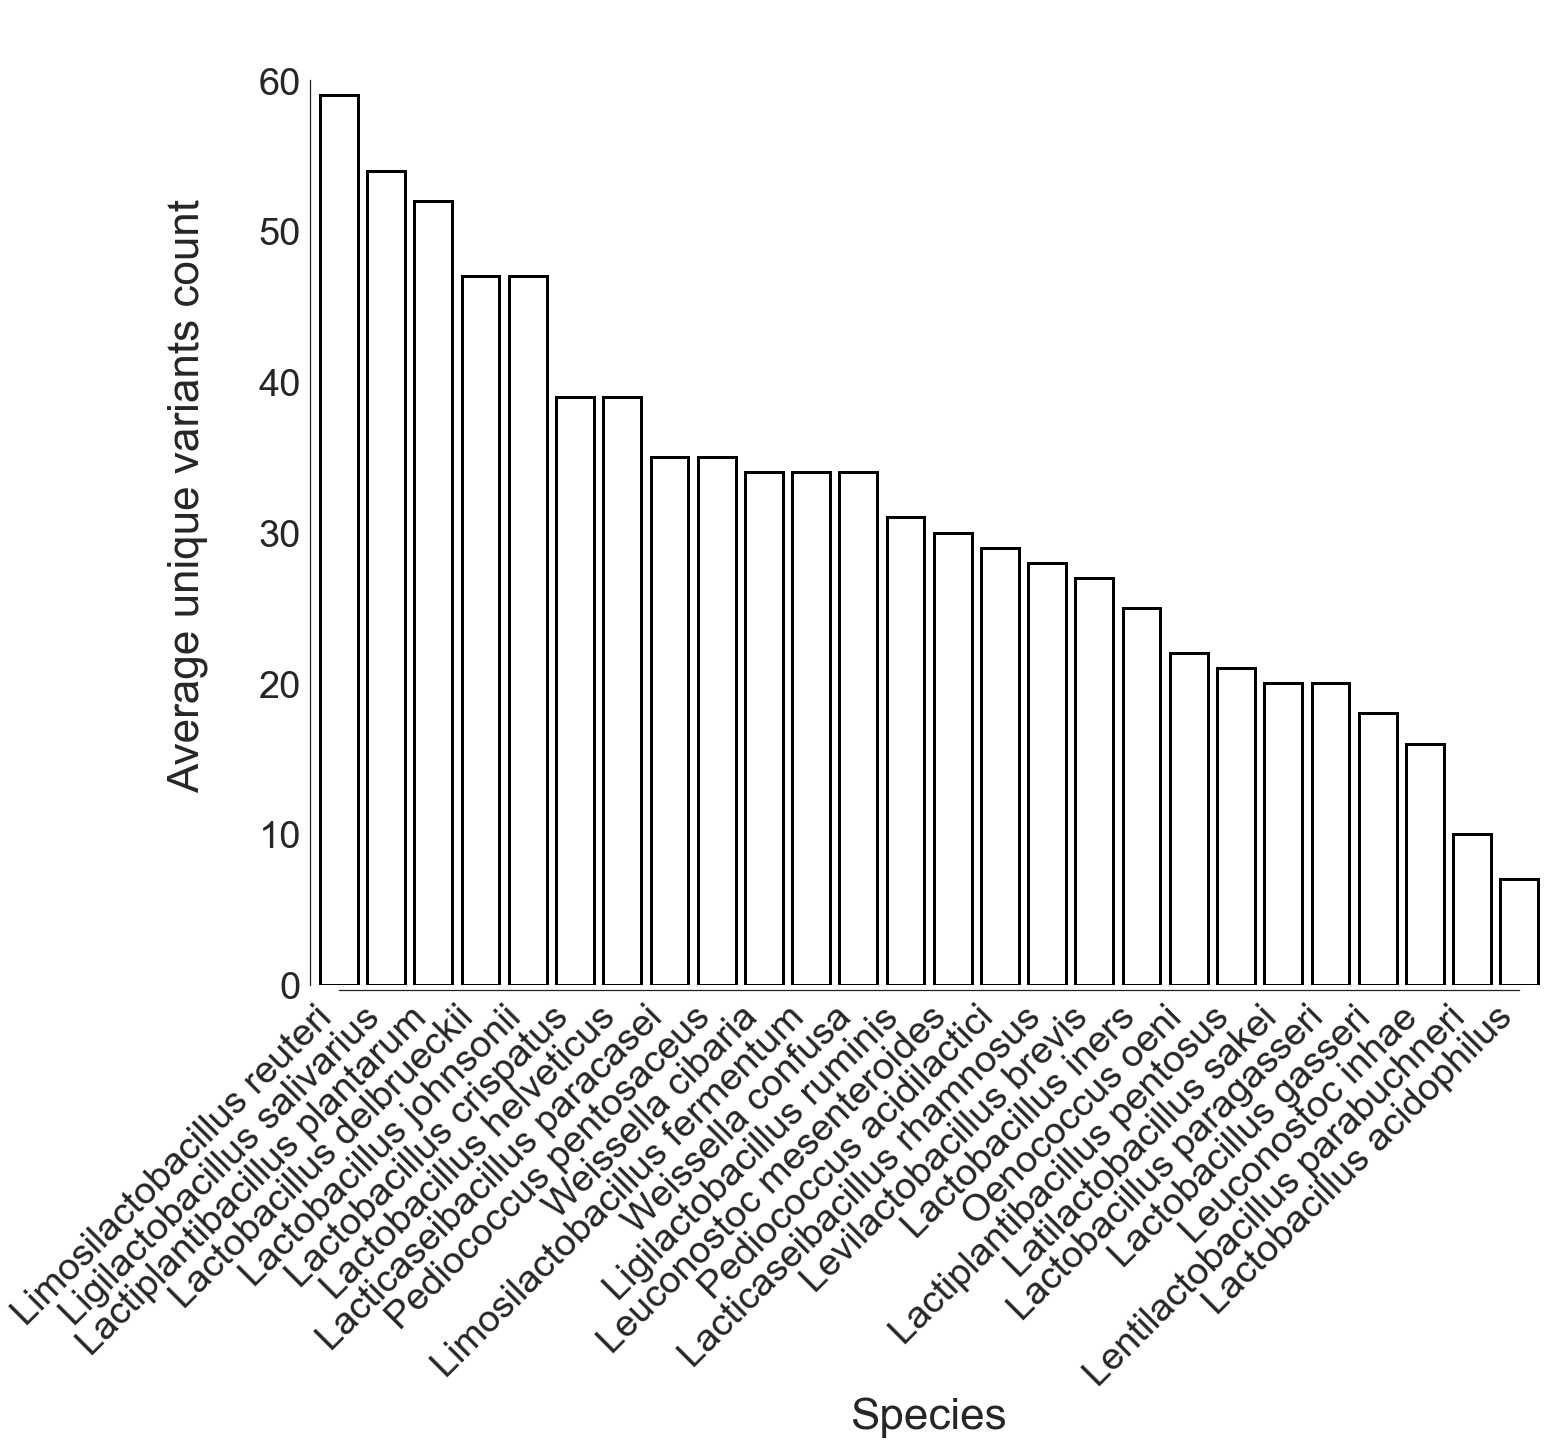

In [47]:
#Figure 2D

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
un=pd.read_csv('lacto_all_unique_insertion_deletion_and_substitutions_count_with_species_name.csv', index_col=0)
un1=un.groupby('Species')['Mutation_count'].sum().reset_index()
d1=pd.read_csv('lacto_all_core_genes_and_variant_genes.csv', index_col=0)
d1['Species'] = d1['Species'].apply({'Pediococcus_acidilactici':'Pediococcus acidilactici','Lactobacillus_crispatus':'Lactobacillus crispatus','Lactobacillus_delbrueckii':'Lactobacillus delbrueckii','Lactobacillus_johnsonii':'Lactobacillus johnsonii','Lactobacillus_helveticus':'Lactobacillus helveticus','Lactobacillus_paragasseri':'Lactobacillus paragasseri','Pediococcus_pentosaceus':'Pediococcus pentosaceus','Lactobacillus_iners':'Lactobacillus iners','Lactobacillus_gasseri':'Lactobacillus gasseri','Lactobacillus_acidophilus':'Lactobacillus acidophilus','Weissella_confusa':'Weissella confusa','Weissella_cibaria':'Weissella cibaria','Lactiplantibacillus_plantarum':'Lactiplantibacillus plantarum','Lactiplantibacillus_pentosus':'Lactiplantibacillus pentosus','Ligilactobacillus_salivarius':'Ligilactobacillus salivarius','Ligilactobacillus_ruminis':'Ligilactobacillus ruminis','Leuconostoc_mesenteroides':'Leuconostoc mesenteroides','Leuconostoc_inhae':'Leuconostoc inhae','Lacticaseibacillus_paracasei':'Lacticaseibacillus paracasei','Lacticaseibacillus_rhamnosus':'Lacticaseibacillus rhamnosus','Oenococcus_oeni':'Oenococcus oeni','Latilactobacillus_sakei':'Latilactobacillus sakei','Lentilactobacillus_parabuchneri':'Lentilactobacillus parabuchneri','Limosilactobacillus_fermentum':'Limosilactobacillus fermentum','Limosilactobacillus_reuteri':'Limosilactobacillus reuteri','Levilactobacillus_brevis':'Levilactobacillus brevis'}.get)
d3=pd.merge(un1, d1, on='Species')
d4=d3[['Species','Mutation_count','Core_genes']]
d4['Avg_uniq_var_per_gene']=d4['Mutation_count']/d4['Core_genes']
d4['Avg_uniq_var_per_gene']=d4['Avg_uniq_var_per_gene'].round(0)
array=d4['Avg_uniq_var_per_gene']
d4=d4.sort_values(by='Avg_uniq_var_per_gene', ascending=False)
rank = array.argsort()
pal=sns.color_palette("light:b_r", len(d4))
fig, ax= plt.subplots(figsize=(22,18))
ax1=sns.barplot(data=d4, x="Species", y="Avg_uniq_var_per_gene",width=0.8,palette=['white'], edgecolor='black')
plt.setp(ax.patches, linewidth=3)
ax.tick_params(axis='x', labelsize=38)
ax.tick_params(axis='y', labelsize=38)
sns.despine(offset=5, trim=True)
ax.margins(y=0.1)
plt.xticks(rotation = 45, ha="right") # Rotates X-Axis Ticks by 45-degrees
sns.despine()
plt.xlabel('Species',fontsize=44)
plt.ylabel('Average unique variants count\n',fontsize=44)
plt.show()

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/4212980047.py:43: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/4212980047.py:47: UserWarning:

Attempt to set non-positive xlim on a log-scaled axis will be ignored.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/4212980047.py:48: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



(0.5970596836351004, 10000)

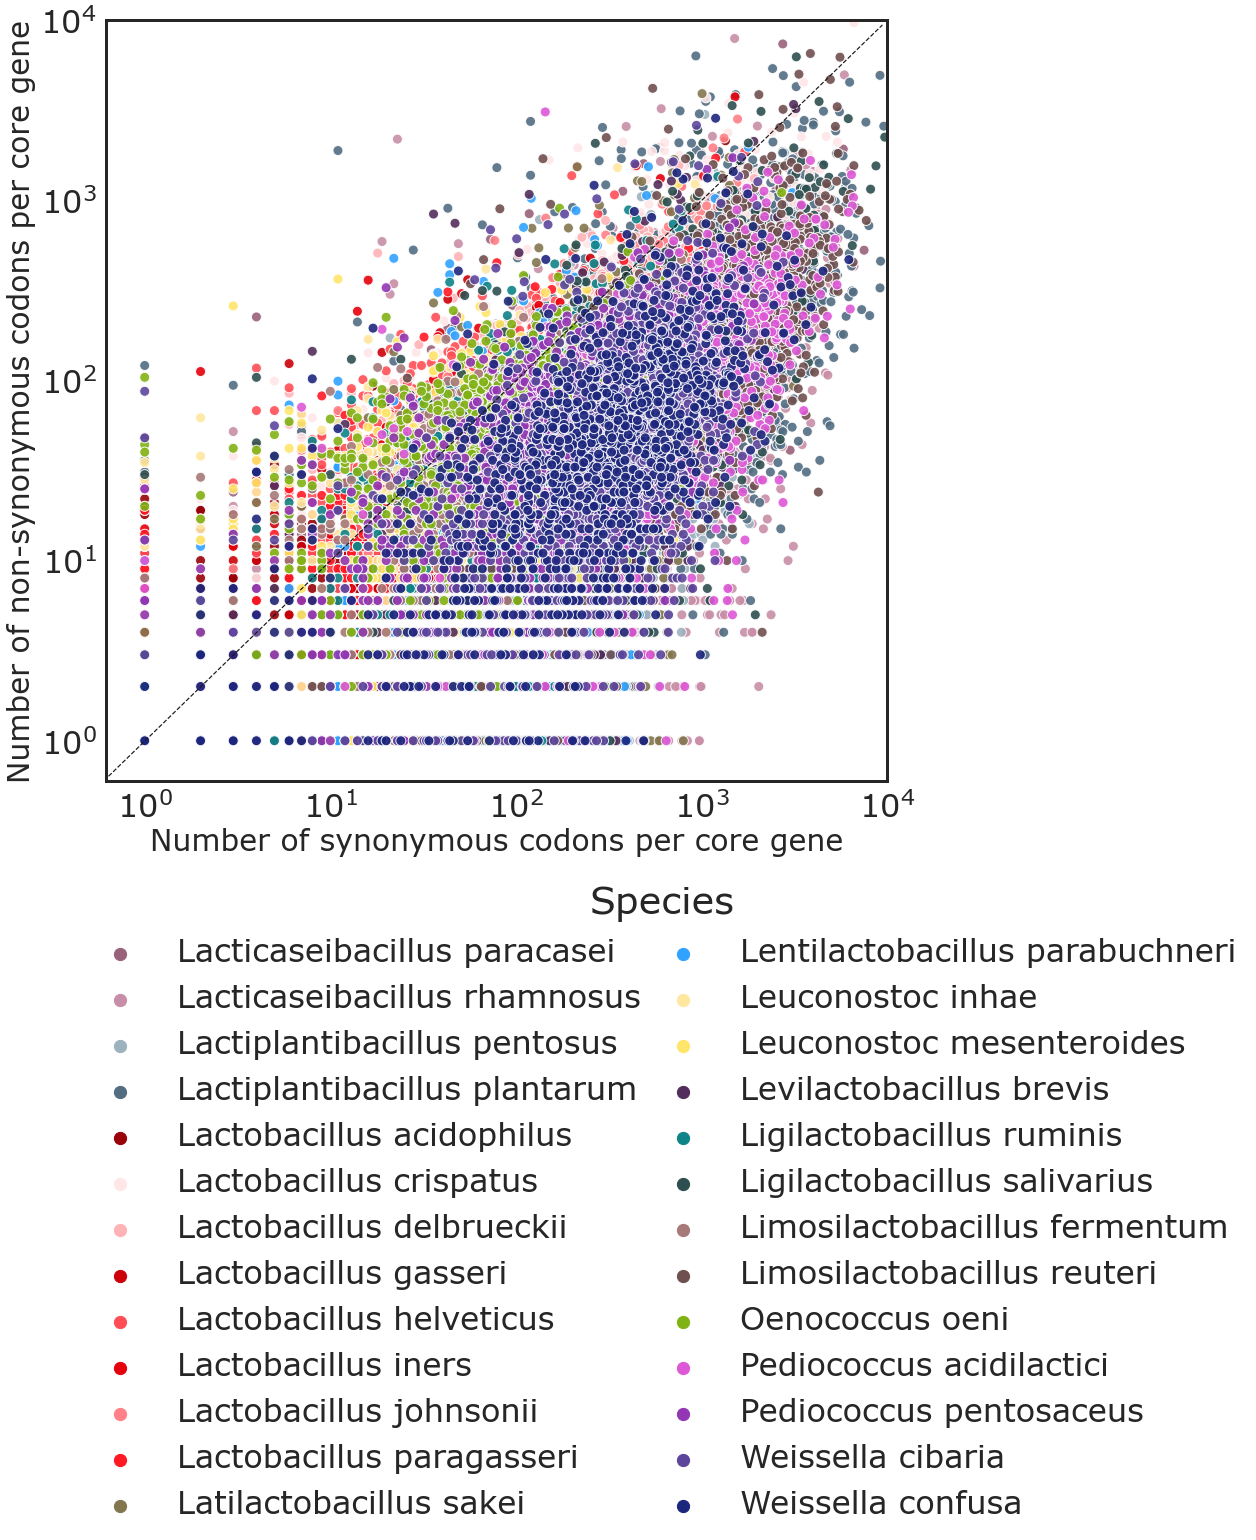

In [91]:
#Figure 3B

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white")
b=pd.read_csv('final_dn_ds_count_per_gene_each_species.csv')
conditions = [
    (b['dN/dS'] > 1 ),
    (b['dN/dS'] == 1 ),
    (b['dN/dS'] < 1 ) ,
    ]
# create a list of the values we want to assign for each condition
values = ['dN/dS > 1', 'dN/dS = 1', 'dN/dS < 1']
# create a new column and use np.select to assign values to it using our lists as arguments
b['dN/dS'] = np.select(conditions, values)
b=b.rename(columns = {'dN/dS':'dN/dS ratio'})
plt.rcParams["font.family"] = "Verdana"
plt.rc('font', size=38)
col_dict={'Pediococcus pentosaceus':'#9336B4', 'Pediococcus acidilactici':'#DD58D6','Lactobacillus crispatus':'#FFE6E7','Lactobacillus delbrueckii':'#FFB3B6','Lactobacillus johnsonii':'#FF8086','Lactobacillus helveticus':'#FF4D55',
    'Lactobacillus paragasseri':'#FF1925','Lactobacillus iners':'#E6000B','Lactobacillus gasseri':'#CC000A','Lactobacillus acidophilus':'#990008','Weissella confusa':'#1D267D','Weissella cibaria':'#5C469C',
    'Lactiplantibacillus plantarum':'#526D82','Lactiplantibacillus pentosus':'#9DB2BF','Ligilactobacillus salivarius':'#2E4F4F','Ligilactobacillus ruminis':'#0E8388',
    'Leuconostoc mesenteroides':'#FFE569','Leuconostoc inhae':'#FFE7A0','Lacticaseibacillus paracasei':'#99627A','Lacticaseibacillus rhamnosus':'#C88EA7',
    'Oenococcus oeni':'#81B214','Latilactobacillus sakei':'#83764F','Lentilactobacillus parabuchneri':'#30A2FF',
    'Limosilactobacillus fermentum':'#A77979','Limosilactobacillus reuteri':'#704F4F','Levilactobacillus brevis':'#522D5B'}
fig, ax= plt.subplots(figsize=(14,14))
ax=sns.scatterplot(x="Synonymous_count", y="Non_synonymous_count",
                hue="Species",
                palette=col_dict,
                 linewidth=1,s=100,alpha=0.9,
                data=b, ax=ax)
for _,s in ax.spines.items():
    s.set_linewidth(3)
plt.xlabel('Number of synonymous codons per core gene',fontsize=30)
plt.ylabel('Number of non-synonymous codons per core gene',fontsize=30)
t = np.arange(0, 9400., 0.995)
plt.plot(t, 'k--',linewidth=1.2)
plt.yticks(fontsize=32)
plt.xticks(fontsize=32)
legend=plt.legend(bbox_to_anchor=(-0.06, -0.10), ncol=2, title='Species',columnspacing=0.3,title_fontsize=38,fontsize="32", frameon=False)
for handle in legend.legendHandles:
    handle._sizes=[150]
plt.xscale('log')
plt.yscale('log')
plt.xlim([0, 10000])
plt.ylim([0, 10000])



/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/2700672979.py:51: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 10000])
/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/2700672979.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 10000])


(0.5939097651209824, 10000)

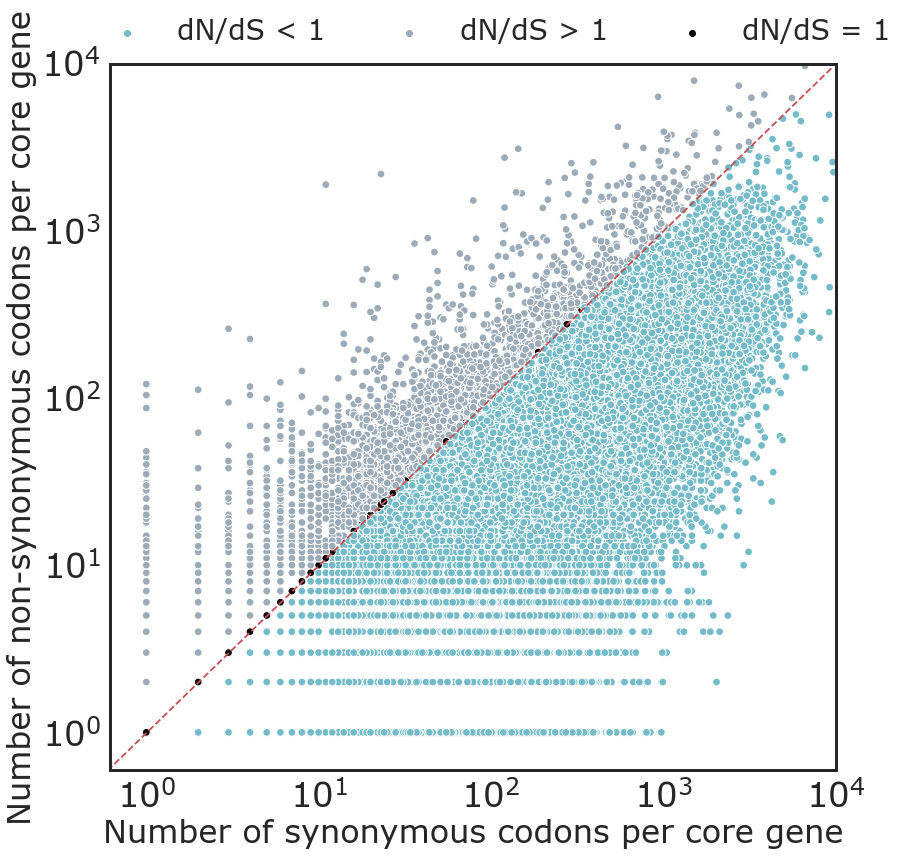

In [50]:
#Figure 3A

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

b=pd.read_csv('final_dn_ds_count_per_gene_each_species.csv', index_col=0)
b=b.rename(columns = {'dN/dS ratio':'dN/dS'})
#map values according to dn/ds values
conditions = [
    (b['dN/dS'] > 1 ),
    (b['dN/dS'] == 1 ),
    (b['dN/dS'] < 1 ) ,
    ] 
# create a list of the values we want to assign for each condition
values = ['dN/dS > 1', 'dN/dS = 1', 'dN/dS < 1']
# create a new column and use np.select to assign values to it using our lists as arguments
b['dN/dS'] = np.select(conditions, values)
plt.rcParams["font.family"] = "Verdana"
plt.rc('font', size=25)
fig, ax= plt.subplots(figsize=(13,13))
for _,s in ax.spines.items():
    s.set_linewidth(3)
t = np.arange(0., 9500., 0.99)
plt.plot(t, 'r--',linewidth=1.8)
sns.scatterplot(x="Synonymous_count", y="Non_synonymous_count",
                 linewidth=1,hue='dN/dS',s=60,palette=['#73BBC9','#9BABB8','black'],
                data=b, ax=ax)
plt.xlabel('Number of synonymous codons per core gene',fontsize=32)
plt.ylabel('Number of non-synonymous codons per core gene',fontsize=32)
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(0.53, 1.10), ncol=3, title=None,fontsize="28", frameon=False,
)
plt.yticks(fontsize=34)
plt.xticks(fontsize=34)
plt.xscale('log')
plt.yscale('log')
plt.xlim([0, 10000])
plt.ylim([0, 10000])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/2792878602.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 [Text(0.01, 0, '$\\mathdefault{10^{-2}}$'),
  Text(0.1, 0, '$\\mathdefault{10^{-1}}$'),
  Text(1.0, 0, '$\\mathdefault{10^{0}}$'),
  Text(10.0, 0, '$\\mathdefault{10^{1}}$'),
  Text(100.0, 0, '$\\mathdefault{10^{2}}$'),
  Text(1000.0, 0, '$\\mathdefault{10^{3}}$'),
  Text(10000.0, 0, '$\\mathdefault{10^{4}}$'),
  Text(100000.0, 0, '$\\mathdefault{10^{5}}$')])

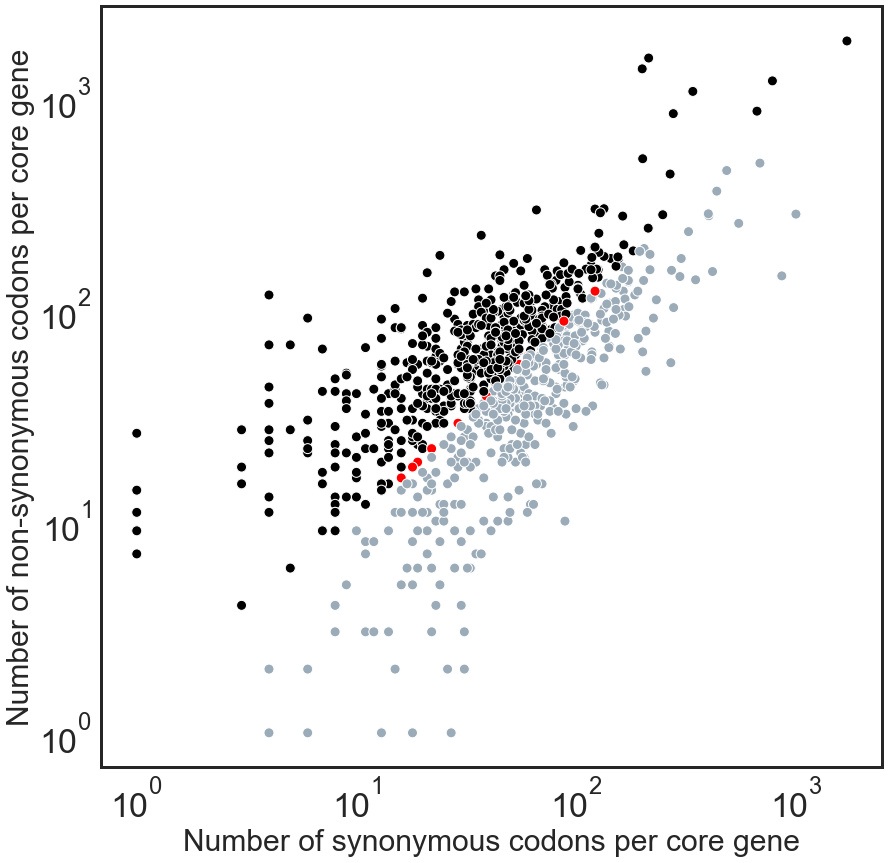

In [90]:
#Figure 3D

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_theme(style="white")
b=pd.read_csv('final_dn_ds_count_per_gene_each_species.csv')
b1=b[b.Species == 'Lactobacillus helveticus']
conditions = [
    (b1['dN/dS'] > 1 ),
    (b1['dN/dS'] == 1 ),
    (b1['dN/dS'] < 1 ) ,
    ]
values = ['dN/dS > 1', 'dN/dS = 1', 'dN/dS < 1']
b1['dN/dS'] = np.select(conditions, values)
fig, ax= plt.subplots(figsize=(14,14))
sns.scatterplot(x="Synonymous_count", y="Non_synonymous_count",
                 linewidth=1,hue='dN/dS',s=100,palette=['black','#9BABB8','red'],
                data=b1, ax=ax, legend=False)
for _,s in ax.spines.items():
    s.set_linewidth(3)
plt.xlabel('Number of synonymous codons per core gene',fontsize=30)
plt.ylabel('Number of non-synonymous codons per core gene',fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.yticks(fontsize=34)
plt.xticks(fontsize=34)

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_45416/3510096355.py:19: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(0, 1800, 500)


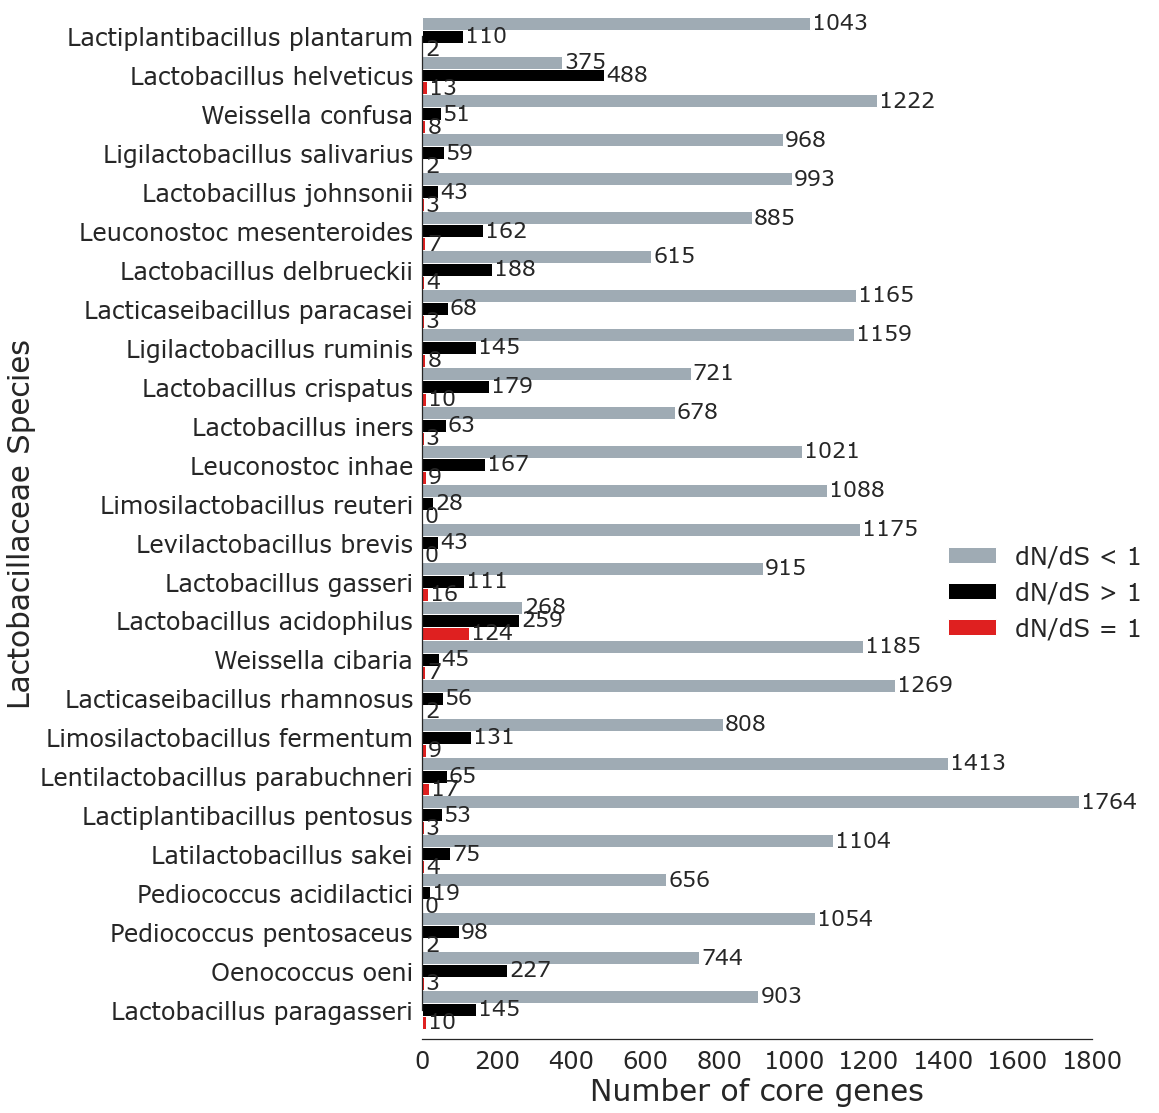

In [9]:
#Figure 3C
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('lacto_all_count_of_genes_with_dnds_ratio_count_classi.csv', index_col=0)
df1.head()
df2=df1.melt(id_vars=["Species"], 
        var_name="dn/ds", 
       value_name="Gene_count")
fig, ax= plt.subplots(figsize=(12,19))
ax=sns.barplot(data=df2, y="Species", x="Gene_count", hue="dn/ds",width=1,palette=['#9BABB8','black','red'])
for i in ax.containers:
    ax.bar_label(i,padding=2,fontsize=22)
ax.set_xlim(0, 1800, 500)
sns.despine(trim=True)
plt.ylabel("Lactobacillaceae Species", fontsize=30)
plt.xlabel("Number of core genes",fontsize=30)
ax.margins(y=0.01)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(0.93, 0.50), ncol=1, title=None,fontsize="24", frameon=False,
)


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/267310279.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.barplot(x=final_1.index, y=final_1.mut_count,hue=final_1.GS,ci=None,width=1.5,palette=gs_dict,dodge=False)


Text(0, 0.5, 'Grantham score')

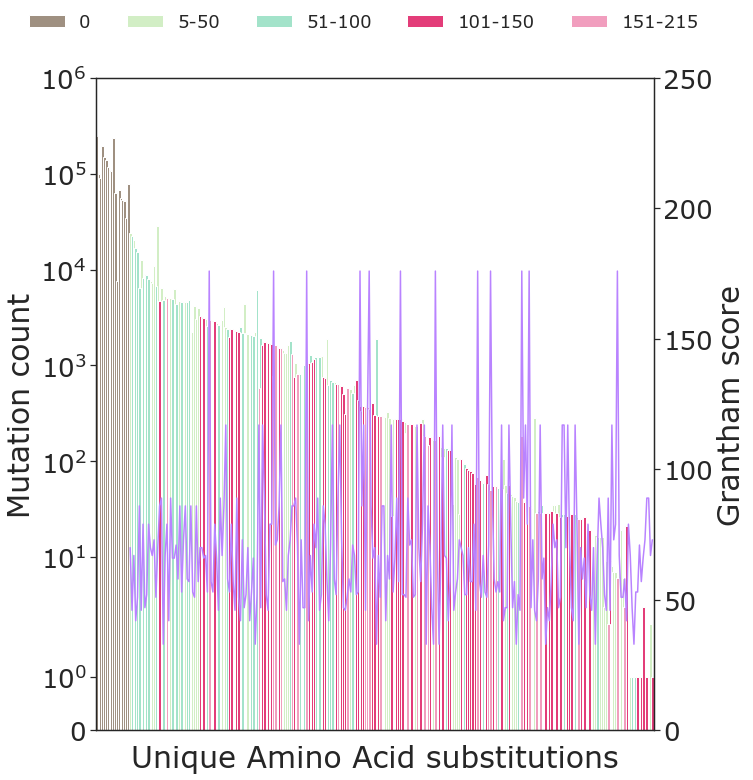

In [65]:
#Figure 5C

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#fig, ax1 = plt.subplots()
final_1=pd.read_csv('syno_non_syno_amino_acid_substitutions.csv', index_col=0)
conditions = [
    (final_1['Grantham_dist'] == 0),
    ((final_1['Grantham_dist'] > 5) &  (final_1['Grantham_dist'] <= 50)),
    ((final_1['Grantham_dist'] > 50) &  (final_1['Grantham_dist'] <= 100) ),
    ((final_1['Grantham_dist'] > 100) &  (final_1['Grantham_dist'] <= 150) ) ,
    ((final_1['Grantham_dist'] > 150) &  (final_1['Grantham_dist'] <= 215))
    ]
values = ['0', '5-50', '51-100','101-150','151-215']
gs_dict={'0':'#A4907C', '5-50':'#98EECC', '51-100':'#D0F5BE','101-150':'#FF2171','151-215':'#FF90BB'}
final_1['GS'] = np.select(conditions, values)
plt.figure(figsize=(10,12))
g=sns.barplot(x=final_1.index, y=final_1.mut_count,hue=final_1.GS,ci=None,width=1.5,palette=gs_dict,dodge=False)
ax1.autoscale(tight=True)
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel('Mutation count',fontsize=30)
plt.xlabel('Unique Amino Acid substitutions',fontsize=30)
g.legend( loc ="upper center",bbox_to_anchor=(0.48, 1.11),ncol=5,fontsize=18, frameon=False,borderaxespad=0., labels=values )
plt.yscale('symlog')
plt.ylim(0,1000000)
ax1 = plt.twinx()
g.set(xticklabels=[])  # remove the tick labels
g.tick_params(bottom=False)  # remove the ticks
g1=sns.lineplot(data=final_1,x='aa_substitution', y='cumAverage', color='#B983FF')
ax1.autoscale(tight=True)
plt.ylim(0,250)
plt.yticks(fontsize=26)
plt.ylabel('Grantham score',fontsize=30)


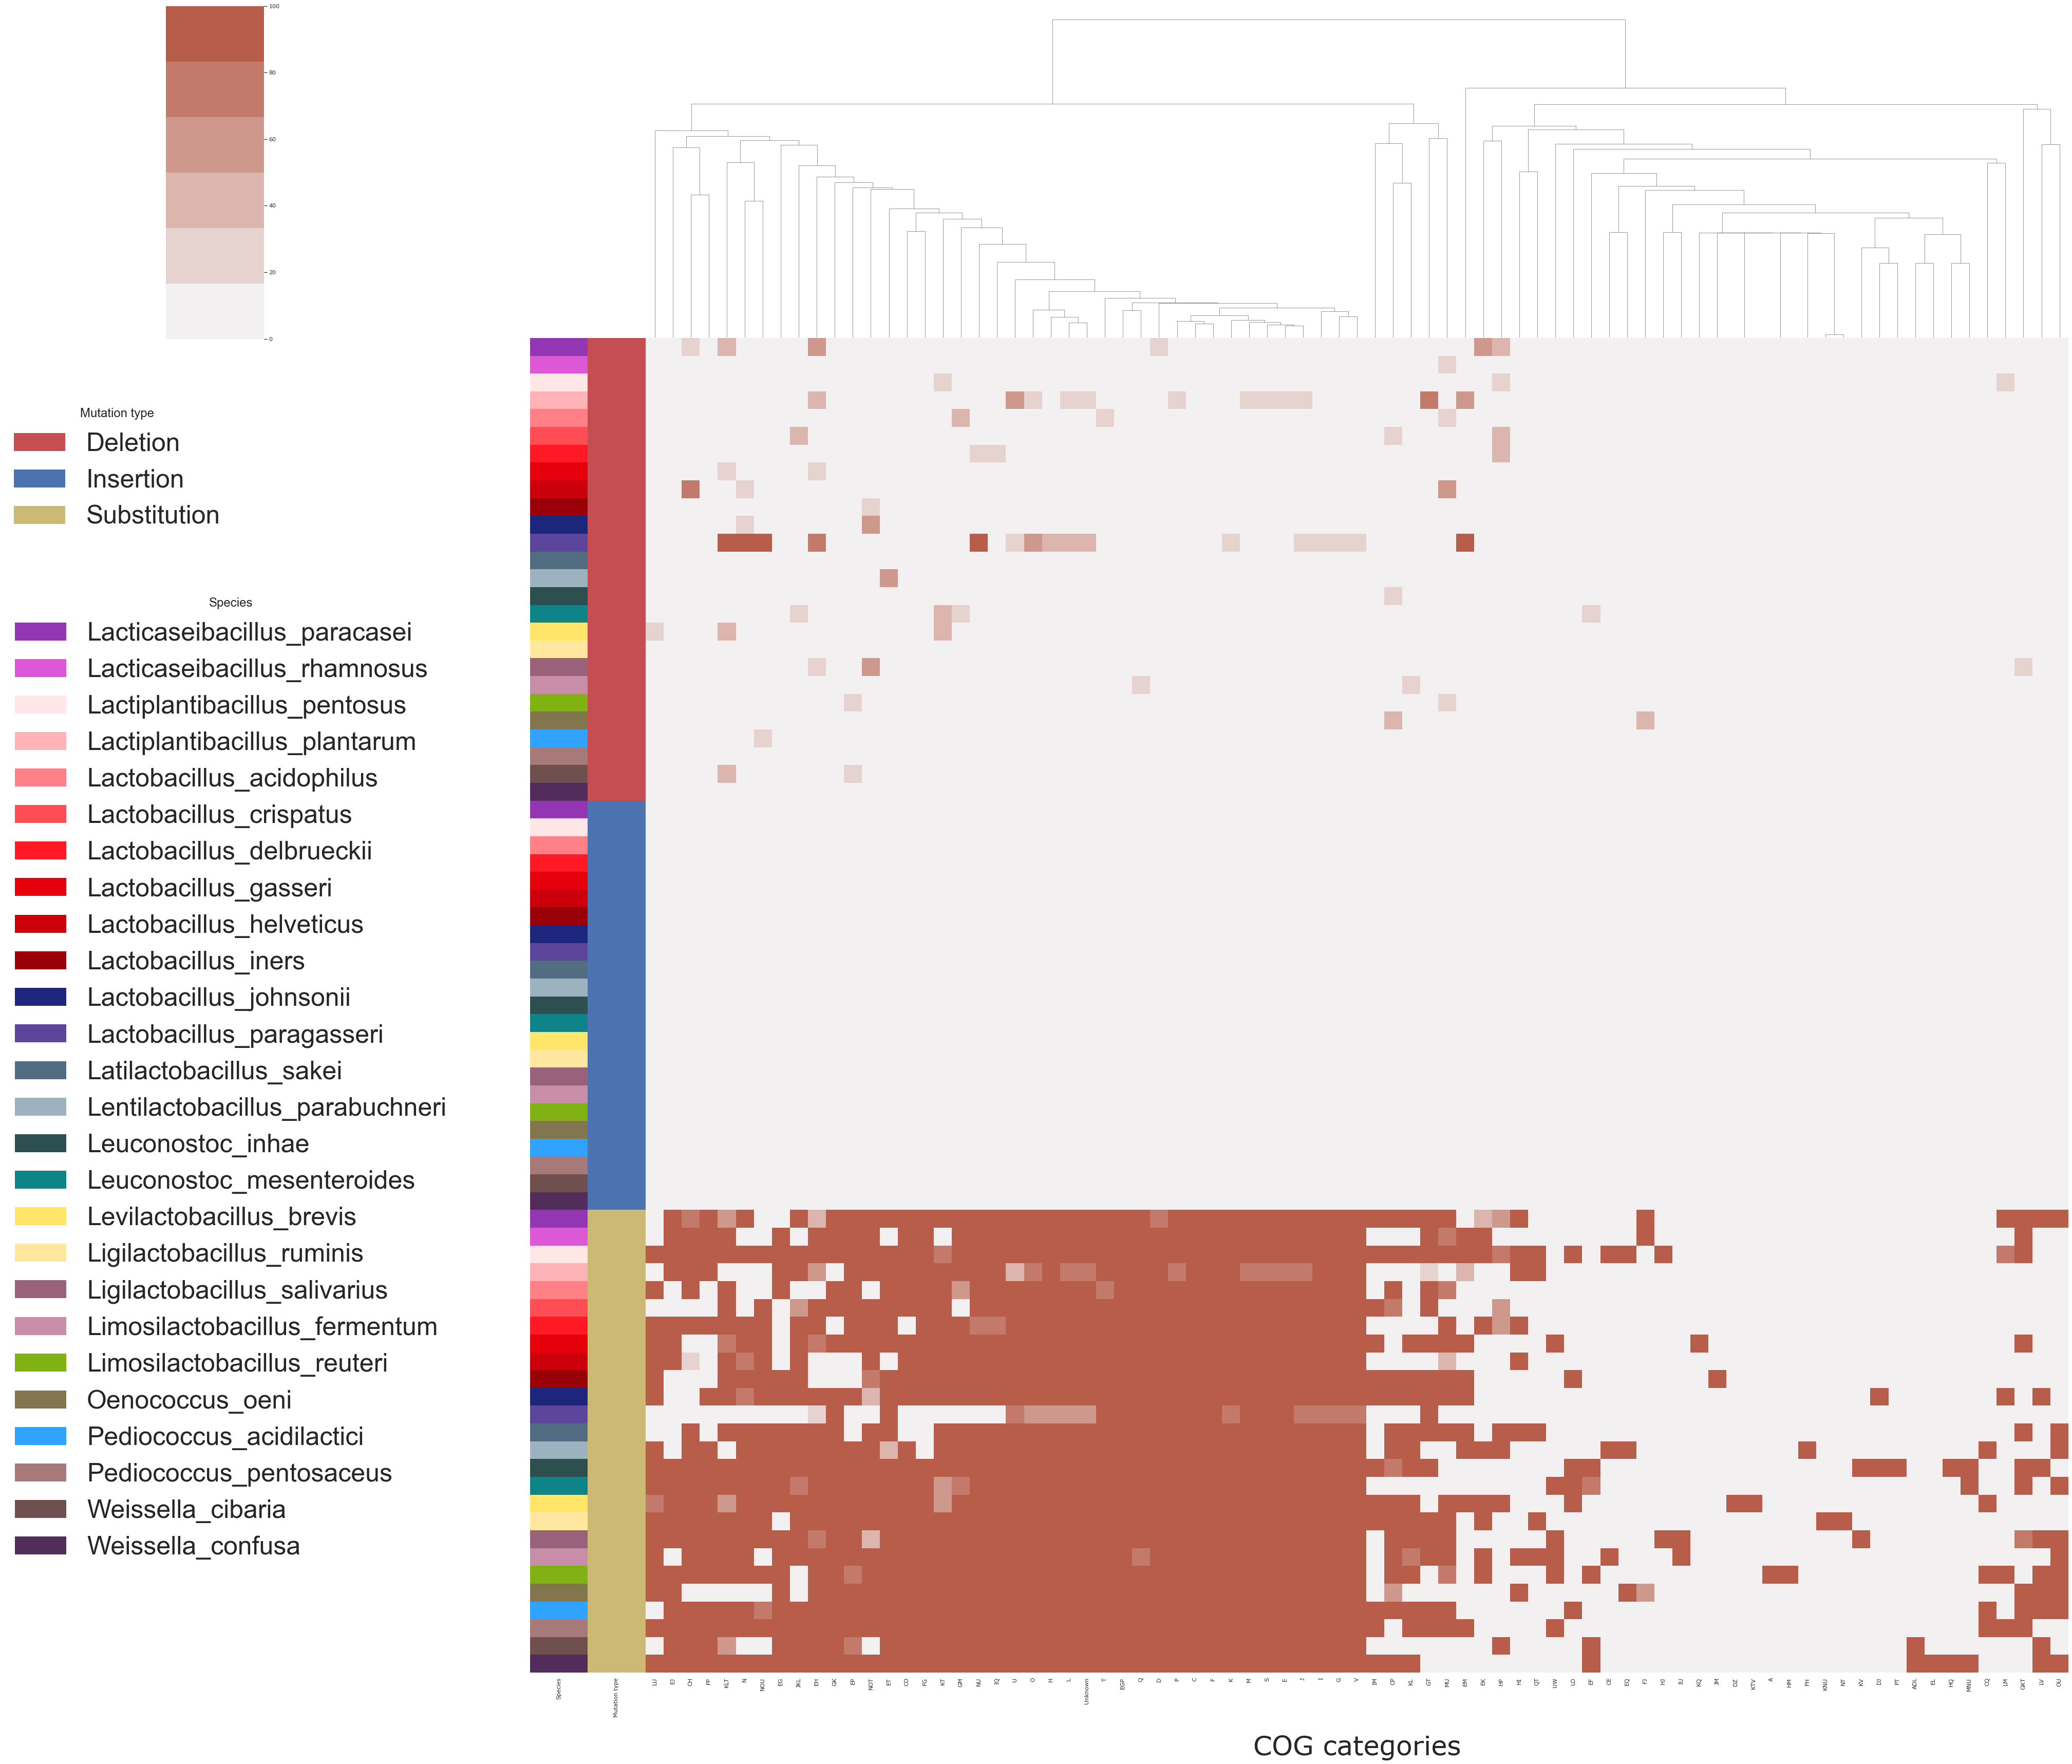

In [66]:
#Figure S2

import pandas as pd
import seaborn as sns
from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt

df=pd.read_csv('lacto_all_26_species_cog_vars_with_mutation_type_with_total_and_percentage.csv', index_col=0)
df.loc[df["COG_category"] == "-", "COG_category"] = 'Unknown'
table = pd.pivot_table(df, values=['Percentage'], index=['AA_mutation_type','Species'],columns=['COG_category'],aggfunc='sum').fillna(0)
table.columns = table.columns
table.reset_index()
table.columns = table.columns.get_level_values(1)
t=table.reset_index()
mut = t.pop("AA_mutation_type")
sp=t.pop("Species")
lut = dict(zip(mut.unique(), "rby"))
mut_colors = mut.map(lut)
sp_pal=['#9336B4','#DD58D6','#FFE6E7','#FFB3B6','#FF8086','#FF4D55','#FF1925','#E6000B','#CC000A','#990008','#1D267D','#5C469C', '#526D82','#9DB2BF','#2E4F4F','#0E8388','#FFE569','#FFE7A0','#99627A','#C88EA7','#81B214','#83764F','#30A2FF','#A77979','#704F4F','#522D5B']
sp_lut = dict(zip(map(str, sp.unique()), sp_pal))
sp_colors = pd.Series(sp).map(sp_lut)
row_colors = pd.DataFrame({'Species':sp_colors,'Mutation type':mut_colors})
co=sns.light_palette((20, 60, 50), input="husl")
g=sns.clustermap(t,row_colors=row_colors,row_cluster=False,col_cluster=True,yticklabels=False,xticklabels=True,figsize=(40, 20), cmap=co)
g.fig.set_size_inches((53,50))
sns.set(font_scale=2.0) 
for label in mut.unique():
    g.ax_col_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0);
l1 = g.ax_col_dendrogram.legend(title='Mutation type', loc="center",fontsize=50, ncol=1, bbox_to_anchor=(-0.005, 0.73), bbox_transform=gcf().transFigure, frameon=False)
for label in sp.unique():
    g.ax_row_dendrogram.bar(0, 0, color=sp_lut[label], label=label, linewidth=0);
l2 = g.ax_row_dendrogram.legend(title='Species', loc="center", ncol=1, fontsize=50,bbox_to_anchor=(0.053, 0.40), bbox_transform=gcf().transFigure,frameon=False)
plt.rcParams["axes.labelsize"] = 30
g.ax_heatmap.set_xlabel('\nCOG categories',fontsize=52)
plt.show()


In [70]:
#Figure S6

import plotly.express as px
import plotly.io as pio
import pandas as pd
import numpy as np

df3=pd.read_csv('Strain_counts_and_var_counts_in_source_class_lacto_all_species.csv', index_col=0)
df3['Species'] = df3['Species'].apply({'Pediococcus_acidilactici':'Pediococcus acidilactici','Lactobacillus_crispatus':'Lactobacillus crispatus','Lactobacillus_delbrueckii':'Lactobacillus delbrueckii','Lactobacillus_johnsonii':'Lactobacillus johnsonii','Lactobacillus_helveticus':'Lactobacillus helveticus','Lactobacillus_paragasseri':'Lactobacillus paragasseri','Pediococcus_pentosaceus':'Pediococcus pentosaceus','Lactobacillus_iners':'Lactobacillus iners','Lactobacillus_gasseri':'Lactobacillus gasseri','Lactobacillus_acidophilus':'Lactobacillus acidophilus','Weissella_confusa':'Weissella confusa','Weissella_cibaria':'Weissella cibaria','Lactiplantibacillus_plantarum':'Lactiplantibacillus plantarum','Lactiplantibacillus_pentosus':'Lactiplantibacillus pentosus','Ligilactobacillus_salivarius':'Ligilactobacillus salivarius','Ligilactobacillus_ruminis':'Ligilactobacillus ruminis','Leuconostoc_mesenteroides':'Leuconostoc mesenteroides','Leuconostoc_inhae':'Leuconostoc inhae','Lacticaseibacillus_paracasei':'Lacticaseibacillus paracasei','Lacticaseibacillus_rhamnosus':'Lacticaseibacillus rhamnosus','Oenococcus_oeni':'Oenococcus oeni','Latilactobacillus_sakei':'Latilactobacillus sakei','Lentilactobacillus_parabuchneri':'Lentilactobacillus parabuchneri','Limosilactobacillus_fermentum':'Limosilactobacillus fermentum','Limosilactobacillus_reuteri':'Limosilactobacillus reuteri','Levilactobacillus_brevis':'Levilactobacillus brevis'}.get)
df3 = df3.drop(df3[(df3.Source_class  == 'Unknown')].index)
fig = px.treemap(df3, path=[px.Constant("Lactobacillus family"), 'Genus', 'Species','Source_class','Total strains'], values='Variant %',
                  color='Genus',
                  width = 1150,height = 950)
fig.update_traces(root_color="black",textinfo = "label+value")
fig.update_layout(font=dict(
        family="Times Roman",
        size=16))
fig.data[0].customdata = fig.data[0].marker.colors
fig.update_layout(margin = dict(t=40, l=50, r=40, b=40))
fig.show()


In [71]:
#Figure 5A

import plotly.express as px
import plotly.io as pio
import pandas as pd
import numpy as np

df3=pd.read_csv('Strain_counts_and_var_counts_in_source_class_lacto_all_species.csv', index_col=0)
df3['Species'] = df3['Species'].apply({'Pediococcus_acidilactici':'Pediococcus acidilactici','Lactobacillus_crispatus':'Lactobacillus crispatus','Lactobacillus_delbrueckii':'Lactobacillus delbrueckii','Lactobacillus_johnsonii':'Lactobacillus johnsonii','Lactobacillus_helveticus':'Lactobacillus helveticus','Lactobacillus_paragasseri':'Lactobacillus paragasseri','Pediococcus_pentosaceus':'Pediococcus pentosaceus','Lactobacillus_iners':'Lactobacillus iners','Lactobacillus_gasseri':'Lactobacillus gasseri','Lactobacillus_acidophilus':'Lactobacillus acidophilus','Weissella_confusa':'Weissella confusa','Weissella_cibaria':'Weissella cibaria','Lactiplantibacillus_plantarum':'Lactiplantibacillus plantarum','Lactiplantibacillus_pentosus':'Lactiplantibacillus pentosus','Ligilactobacillus_salivarius':'Ligilactobacillus salivarius','Ligilactobacillus_ruminis':'Ligilactobacillus ruminis','Leuconostoc_mesenteroides':'Leuconostoc mesenteroides','Leuconostoc_inhae':'Leuconostoc inhae','Lacticaseibacillus_paracasei':'Lacticaseibacillus paracasei','Lacticaseibacillus_rhamnosus':'Lacticaseibacillus rhamnosus','Oenococcus_oeni':'Oenococcus oeni','Latilactobacillus_sakei':'Latilactobacillus sakei','Lentilactobacillus_parabuchneri':'Lentilactobacillus parabuchneri','Limosilactobacillus_fermentum':'Limosilactobacillus fermentum','Limosilactobacillus_reuteri':'Limosilactobacillus reuteri','Levilactobacillus_brevis':'Levilactobacillus brevis'}.get)
df4=df3[df3.Species == 'Lactiplantibacillus plantarum']
fig = px.treemap(df4, path=[px.Constant("Variant distribution across strains in Lactiplantibacillus plantarum"), 'Source_class','GCF_id'], values='Variant %',
                  color_continuous_scale='Blues',width = 1050,height = 950)
fig.update_layout(font=dict(
        family="Times Roman",
        size=30))
fig.update_traces(root_color="lightgray",textinfo = "label+value")
fig.data[0].customdata = fig.data[0].marker.colors
fig.update_layout(margin = dict(t=40, l=50, r=40, b=40))
fig.show()

Text(0.5, 0, 'Number of unique amino acid variants per core gene')

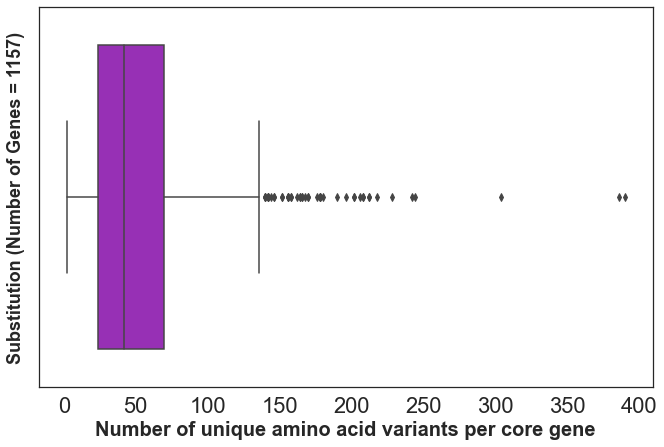

In [84]:
#Figure S4 A

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('core_pan_aa_thresh_count_of_uniq_variants_per_gene.csv')
sns.set_style(style= 'white')
fig, ax = plt.subplots(figsize=(11, 7))
sns.boxplot(x=df['Unique_vars'], color='#A31ACB')
plt.ylabel("Substitution (Number of Genes = 1157)", fontsize=18, weight='bold')
plt.xlabel("Number of unique amino acid variants per core gene", fontsize=20,weight='bold')


Text(0.5, 0, 'Number of unique amino acid deletions per core gene')

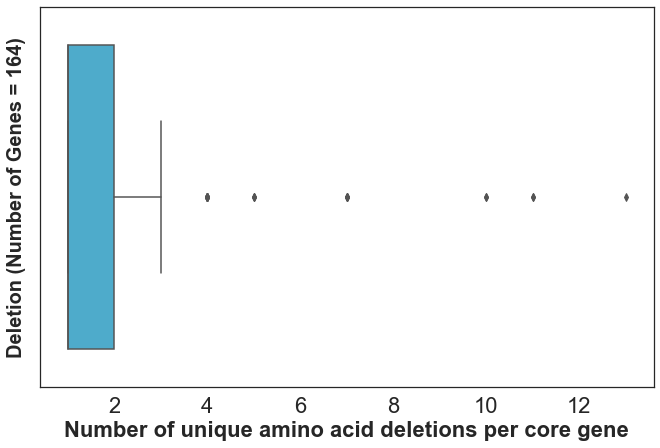

In [83]:
#Figure S4 B
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style= 'white')
df1=pd.read_csv('core_pan_aa_gene_vars_thresh_df.csv')
gene_var_df_del = df1[df1.AA_mutation_type=='Deletion'] 
gene_var_df_del.to_csv('core_pan_aa_thresh_var_deletions.csv')
del_df=pd.read_csv('core_pan_aa_thresh_var_deletions.csv')
count_del=del_df[['GCF_id','AA_cons_seq','AA_start_pos','AA_end_pos']].groupby(del_df['Gene']).value_counts().reset_index(name='del_count_per_gene')
fig, ax = plt.subplots(figsize=(11, 7))
uniq_count_del_df = count_del.groupby(by=['Gene','AA_cons_seq','AA_start_pos','AA_end_pos'], as_index=False).first()
del_un=uniq_count_del_df.groupby('Gene').sum().reset_index()
sns.boxplot(x=del_un['del_count_per_gene'], color='#39B5E0')
plt.ylabel("Deletion (Number of Genes = 164)", fontsize=20, weight='bold')
plt.xlabel("Number of unique amino acid deletions per core gene", weight='bold',fontsize=22)

Text(0, 0.5, 'Number of Genomes (normalized c = 0 - 1)')

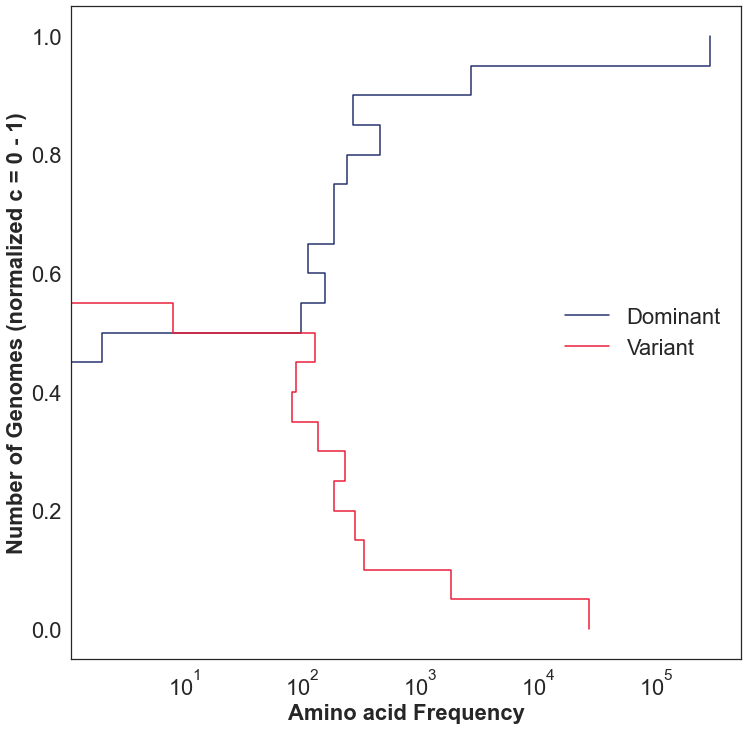

In [85]:
#Figure 4D
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style= 'white')
df=pd.read_csv('final_pan_aa_thresh_core_genes_dom_var_genome_count_pos_normalized.csv')
fig, ax = plt.subplots(figsize=(12,12))
g=sns.histplot(df, y="Genome_count_norm", hue="Sequence_type", element="step",log_scale=(True,False),fill=False, palette=['#EB1D36','#25316D'])
plt.legend(title='',loc='center right', labels=['Dominant', 'Variant'], frameon=False)
plt.setp(g.get_legend().get_texts(), fontsize='22') 
plt.setp(g.get_legend().get_title(), fontsize='22') 
plt.xlabel('Amino acid Frequency', fontsize=22, weight='bold')
plt.ylabel('Number of Genomes (normalized c = 0 - 1)', fontsize=22,weight='bold')

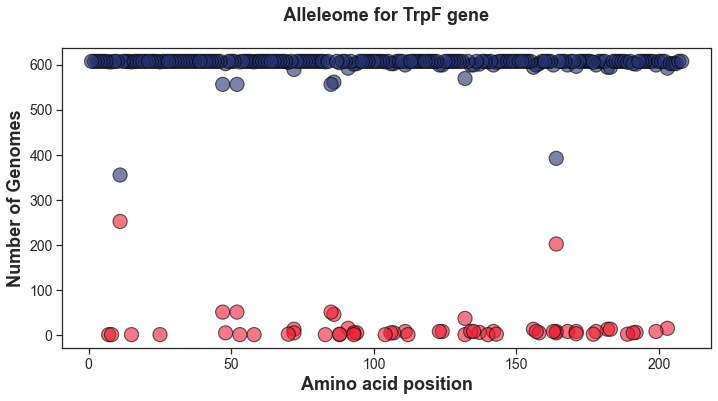

In [86]:
#Figure 4A
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import markers

df=pd.read_csv('trpF_pan_aa_thresh_core_dom_var_pos.csv')
sns.set(style="white")  
plt.rcParams["figure.figsize"] = (18,7)
sns.set(style="ticks")
g=sns.relplot(x="AA_pos", y="Genome_count", hue="Sequence_type", size="Genome_count", 
    palette=['#EB1D36','#25316D'],sizes=(200,200),edgecolor='black', height=5, aspect=2,data=df,alpha=0.6)
g.legend.remove()
sns.despine(top = False, right = False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Amino acid position', fontsize=18,weight='bold')
plt.ylabel('Number of Genomes', fontsize=18,weight='bold')
plt.title(' Alleleome for TrpF gene \n', fontsize=18, weight='bold')
plt.savefig('Lplanta_gene_trpF_thresh_dom_var_aa_pos.png', bbox_inches='tight', edgecolor='auto' )
plt.show()


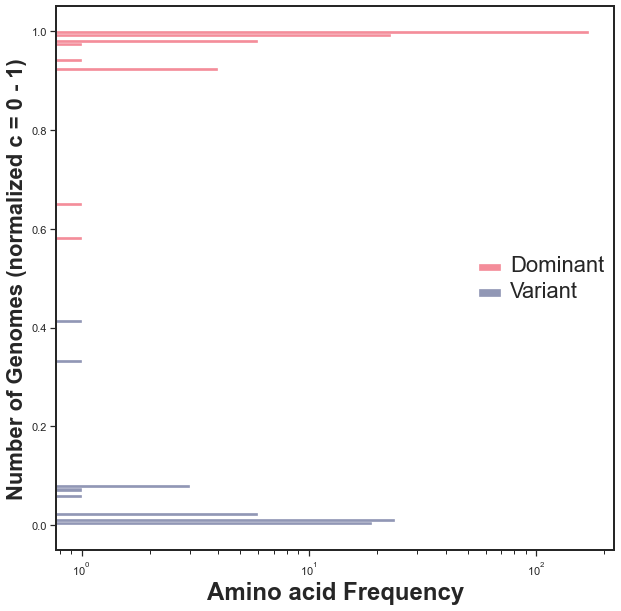

In [87]:
#Figure 4D
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10,10))
data1=pd.read_csv('trpF_thresh_normalized_dom_var.csv')
g=sns.histplot(data1, y="Genome_count_norm", hue="Sequence_type",log_scale=(True,False), palette=['#25316D','#EB1D36'])
sns.move_legend(g, "center right")
plt.legend(title='',loc='center right', labels=['Dominant', 'Variant'], frameon=False)
plt.setp(g.get_legend().get_texts(), fontsize='22') 
plt.setp(g.get_legend().get_title(), fontsize='22') 
plt.xlabel('Amino acid Frequency', fontsize=24,weight='bold')
plt.ylabel('Number of Genomes (normalized c = 0 - 1)', fontsize=22,weight='bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/423314640.py:9: DtypeWarning:

Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.



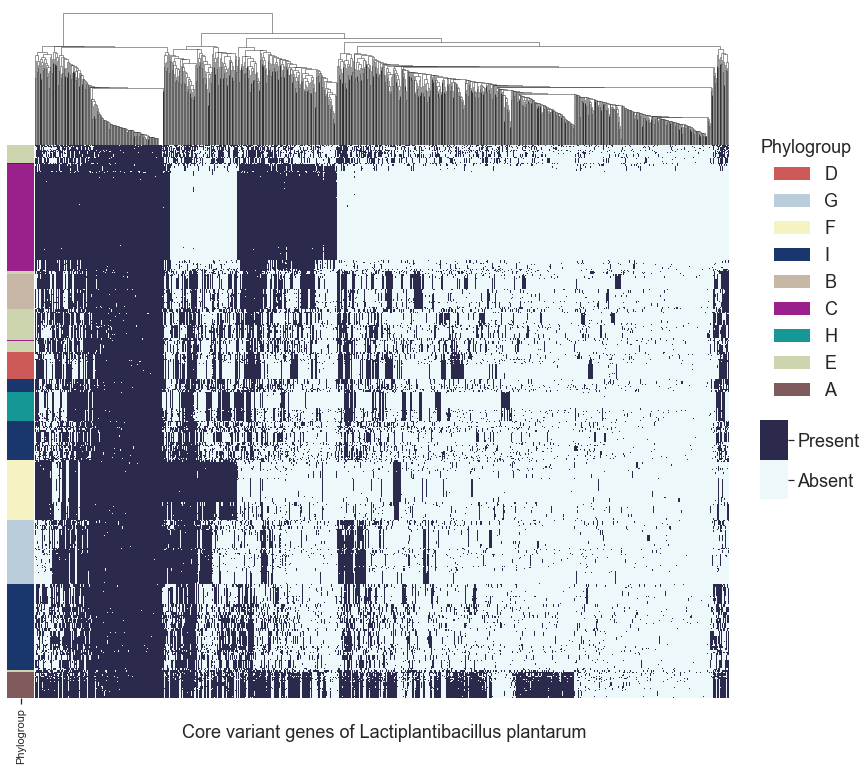

In [88]:
#Figure S7
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df1=pd.read_csv('core_pan_aa_thresh_vars_with_phylogroups_and_COG_category.csv', index_col=0)
df2=df1[['GCF_id','cluster','Gene','Query_locus_tag']]
table =  df2.pivot_table(index=['GCF_id','cluster'], columns='Gene',
                           aggfunc='any', fill_value=0).astype(int)
t=table.reset_index()
stn = t.pop("GCF_id")
phy=t.pop("cluster")
sp_pal=['#CE5959','#BACDDB','#F5F3C1','#19376D','#C8B6A6','#9A208C','#159895','#CCD5AE','#815B5B']
phy_lut = dict(zip(map(str, phy.unique()), sp_pal))
phy_colors = pd.Series(phy).map(phy_lut)
row_colors = pd.DataFrame({'Phylogroup':phy_colors})
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#ECF8F9','#2B2A4C'])
g=sns.clustermap(t,row_colors=row_colors,yticklabels=False,xticklabels=False, cmap=cmap)
sns.set(font_scale=1.5)
g.fig.set_size_inches((13,11))
g.ax_row_dendrogram.set_visible(False)
for label in phy.unique():
    g.ax_col_dendrogram.bar(0, 0, color=phy_lut[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(title='Phylogroup',loc="right", ncol=1,bbox_to_anchor=(1.20, -0.9),frameon=False,fontsize=18)
ax = g.ax_heatmap
ax.set_xlabel('\n Core variant genes of Lactiplantibacillus plantarum', fontsize=18)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Absent', 'Present'])
colorbar.ax.tick_params(labelsize=18)
g.ax_cbar.set_position((1.015, .36, .03, .1))
plt.show()



In [116]:
#Figure 6 C
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1=pd.read_csv('phylo_specific_gene_protein_functions.csv')
df_plot = df1.groupby(['cluster','Gene'])[['Protein']].value_counts().reset_index(name='count')

# Function to split text into two lines after a certain length
def split_text(text, max_len=20):
    if len(text) <= max_len:
        return text
    else:
        for i in range(max_len, 0, -1):
            if text[i] == ' ':
                return text[:i] + '<br>' + text[i+1:]
        # If no space is found to break at max_len
        return text[:max_len] + '<br>' + text[max_len:] + '<br>' + text[max_len:]
df_plot['Protein'] = df_plot['Protein'].apply(split_text)


df_plot
fig = px.treemap(df_plot,
                 values='count',
                 color='Gene',
                 color_continuous_scale='BuGn',
                 path=['cluster','Gene','Protein'])
fig.update_traces(root_color="lightgrey")
fig.update_traces(textfont_size=22)  # Change the value "20" to your desired font size

fig.update_layout(margin = dict(t=30, l=10, r=10, b=10))


fig.show()


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1798248137.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1798248137.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



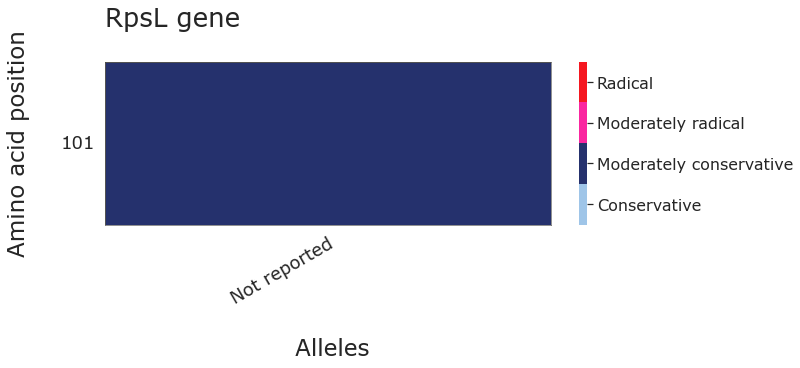

In [113]:
#Figure S8B
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'rpsL']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
from matplotlib import colors
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
bounds=[1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(10,3))  # Sample figsize in inches
x_axis_labels=['Not reported']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=30, ha="right",
         rotation_mode="anchor", size=18)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=18)
plt.ylabel("Amino acid position\n", fontsize=23) 
plt.xlabel("\n Alleles", fontsize=23)
plt.title('RpsL gene\n', loc='left',fontsize=26)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/3211046935.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/3211046935.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



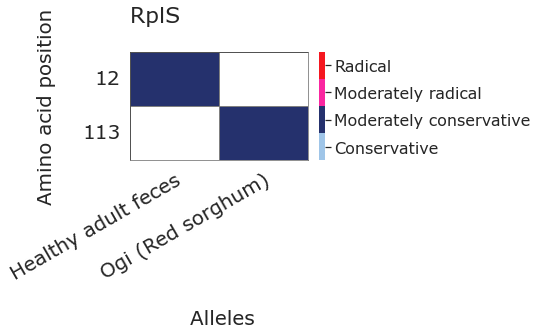

In [112]:
#Figure S8C

import pandas as pd
df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'rplS']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
from matplotlib import colors
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
bounds=[1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(4,2))  # Sample figsize in inches
x_axis_labels=[ 'Healthy adult feces','Ogi (Red sorghum)']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=30, ha="right",
         rotation_mode="anchor", size=20)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=20)
plt.ylabel("Amino acid position\n", fontsize=20) 
plt.xlabel("\n Alleles", fontsize=20)
plt.title('RplS \n', loc='left',fontsize=22)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/3736401426.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/3736401426.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



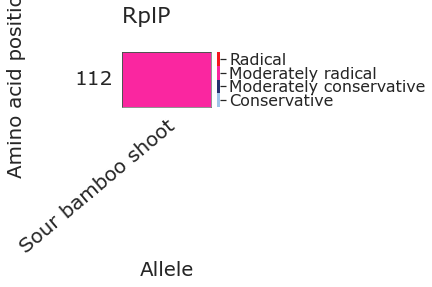

In [111]:
#Figure S8C

import pandas as pd
from matplotlib import colors

df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'rplP']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
bounds=[1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(2,1))  # Sample figsize in inches
x_axis_labels=['Sour bamboo shoot']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=40, ha="right",
         rotation_mode="anchor", size=20)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=20)
plt.ylabel("Amino acid position\n\n", fontsize=20) 
plt.xlabel("Allele", fontsize=20)
plt.title('RplP \n', loc='left',fontsize=22)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1300342801.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1300342801.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



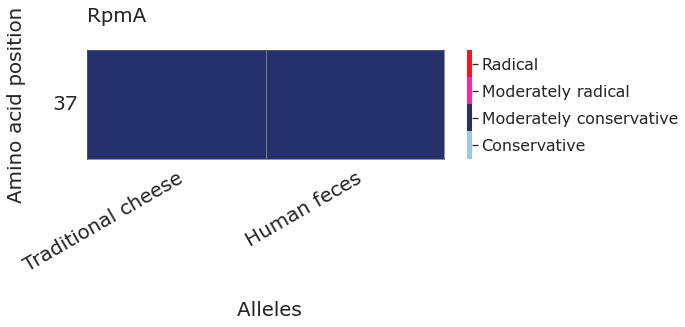

In [110]:
#Figure S8A

import pandas as pd
from matplotlib import colors

df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'rpmA']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
fig, ax = plt.subplots(figsize=(8,2))  # Sample figsize in inches
x_axis_labels =['Traditional cheese', 'Human feces']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=30, ha="right",
         rotation_mode="anchor", size=20)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=20)
plt.ylabel("Amino acid position\n", fontsize=20) 
plt.xlabel("\n Alleles", fontsize=20)
plt.title('RpmA \n', loc='left',fontsize=20)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/3929200641.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/3929200641.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



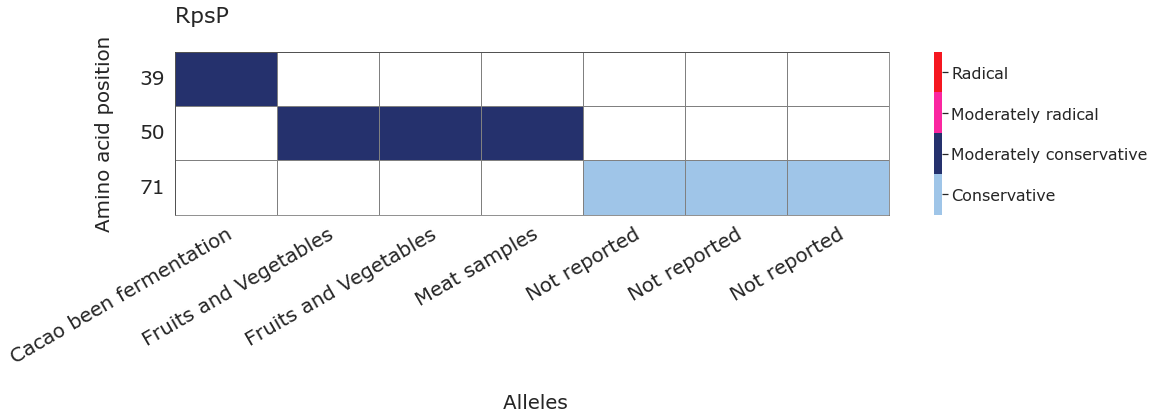

In [109]:
#Figure S8A

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import colors

df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'rpsP']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
cmap_dict = {1: '#9fc5e8', 2: '#25316D', 3: '#FA26A0', 4: '#F51720'}
cmap1 = ListedColormap([cmap_dict[i+1] for i in range(4)])
fig, ax = plt.subplots(figsize=(16,3))  # Sample figsize in inches,
x_axis_labels =['Cacao been fermentation', 'Fruits and Vegetables', 'Fruits and Vegetables', 'Meat samples','Not reported', 'Not reported', 'Not reported']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap1,vmin=1,vmax=4,linewidth=.5,yticklabels=True,xticklabels=x_axis_labels )
plt.xticks(rotation=30, ha="right",
         rotation_mode="anchor", size=20)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=20)
plt.ylabel("Amino acid position\n", fontsize=20) 
plt.xlabel("\n Alleles", fontsize=20)
plt.title('RpsP \n', loc='left', fontsize=22)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/4144099822.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/4144099822.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



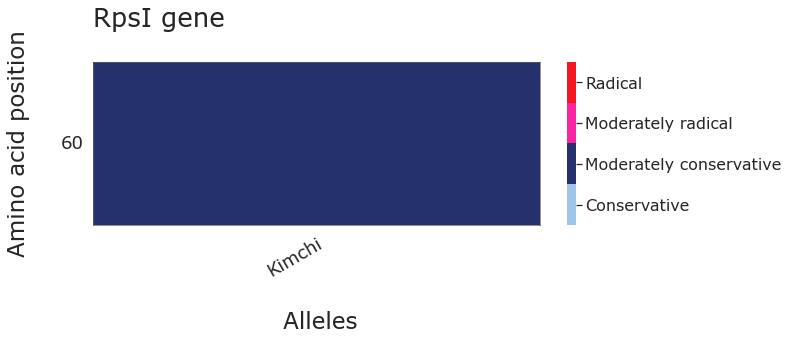

In [107]:
#Figure S8B

import pandas as pd
df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'rpsI']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
from matplotlib import colors
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
bounds=[1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(10,3))  # Sample figsize in inches
x_axis_labels=['Kimchi']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=30, ha="right",
         rotation_mode="anchor", size=18)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=18)
plt.ylabel("Amino acid position\n", fontsize=23) 
plt.xlabel("\n Alleles", fontsize=23)
plt.title('RpsI gene\n', loc='left',fontsize=26)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/979498535.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/979498535.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



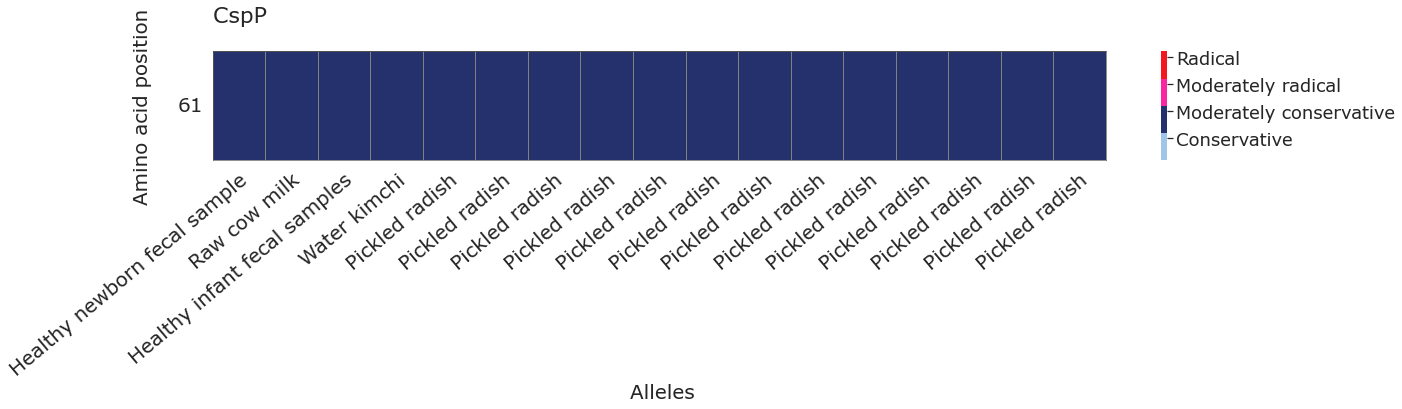

In [106]:
#Figure 7 B

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'cspP']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
from matplotlib import colors
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
bounds=[1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(20,2))  # Sample figsize in inches
x_axis_labels=['Healthy newborn fecal sample', 'Raw cow milk', 'Healthy infant fecal samples', 'Water kimchi', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish', 'Pickled radish']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=40, ha="right",
         rotation_mode="anchor", size=20)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=20)
plt.ylabel("Amino acid position\n", fontsize=20) 
plt.xlabel(" Alleles", fontsize=20)
plt.title('CspP \n', loc='left',fontsize=22)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=18)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.8 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/3262590480.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/3262590480.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



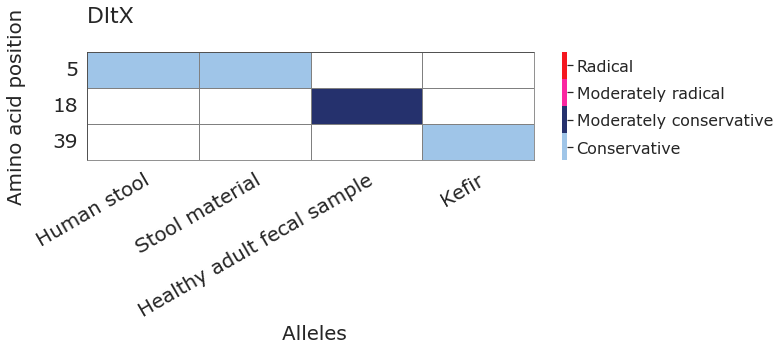

In [105]:
#Figure 7 A

import pandas as pd
df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'dltX']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
from matplotlib import colors
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
bounds=[1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(10,2))  # Sample figsize in inches
x_axis_labels =[ 'Human stool', 'Stool material','Healthy adult fecal sample', 'Kefir']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,vmin=1,vmax=4,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=30, ha="right",
         rotation_mode="anchor", size=20)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=20)
plt.ylabel("Amino acid position\n", fontsize=20) 
plt.xlabel(" Alleles", fontsize=20)
plt.title('DltX \n', loc='left',fontsize=22)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1881295177.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1881295177.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



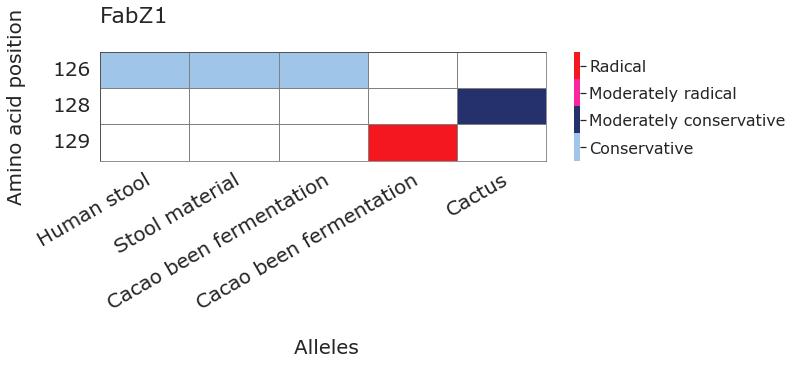

In [114]:
#Figure 7 A

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'fabZ1']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
bounds=[1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(10,2))  # Sample figsize in inches
x_axis_labels =['Human stool','Stool material', 'Cacao been fermentation','Cacao been fermentation','Cactus']
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=30, ha="right",
         rotation_mode="anchor", size=20)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=20)
plt.ylabel("Amino acid position\n", fontsize=20) 
plt.xlabel("\n Alleles", fontsize=20)
plt.title('FabZ1 \n', loc='left',fontsize=22)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])


/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1048193680.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/k8/hfnxgs3n2sdfd9jnywj75spr0000gp/T/ipykernel_90848/1048193680.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



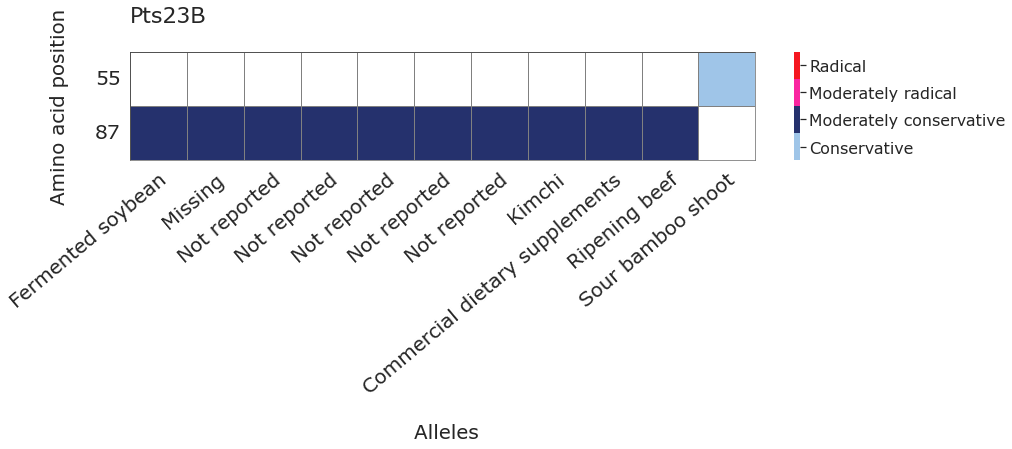

In [104]:
#Figure 7 A

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Unique_gene_allelic_vars_with_all_details.csv', index_col=None)
df_all=df.groupby('cluster')['Gene','AA_pos','GCF_id','Effect','Isolation_source'].value_counts().reset_index(name='Mutation_count')
df_rps=df_all[df_all.Gene == 'pts23B']
h_rps=df_rps[['AA_pos','Effect','GCF_id','Mutation_count']]
effect_dict={'Conservative':1,'Moderately conservative':2,'Moderately Radical':3,'Radical':4}
h_rps['Effect_map'] = h_rps['Effect'].map(effect_dict)
hm_rps = h_rps.pivot(index=['AA_pos'], columns='GCF_id', values='Effect_map')
from matplotlib import colors
cmap = colors.ListedColormap(['#9fc5e8','#25316D','#FA26A0','#F51720'])
bounds=[1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(14,2))  # Sample figsize in inches
x_axis_labels =['Fermented soybean','Missing', 'Not reported','Not reported', 'Not reported', 'Not reported', 'Not reported', 'Kimchi', 'Commercial dietary supplements','Ripening beef', 'Sour bamboo shoot' ]
res=sns.heatmap(hm_rps, annot=False,linecolor='grey',cmap=cmap,vmin=1,vmax=4,linewidth=.5,yticklabels=True, xticklabels=x_axis_labels)
plt.xticks(rotation=40, ha="right",
         rotation_mode="anchor", size=20)
plt.yticks(rotation=0, ha="right",
         rotation_mode="anchor", size=20)
plt.ylabel("Amino acid position\n", fontsize=20) 
plt.xlabel("\n Alleles", fontsize=20)
plt.title('Pts23B\n', loc='left',fontsize=22)
# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
n=4
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Conservative','Moderately conservative','Moderately radical','Radical'])
